In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
import geopandas as gpd
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_excel('ESG_WorldBank_20042023_AllCountries_transposed.xlsx', sheet_name='output')
df.head()

Country Name Continent Country Code  Year  \
0  Afghanistan      Asia          AFG  2004   
1  Afghanistan      Asia          AFG  2005   
2  Afghanistan      Asia          AFG  2006   
3  Afghanistan      Asia          AFG  2007   
4  Afghanistan      Asia          AFG  2008   

   Access to clean fuels and technologies for cooking (% of population)  \
0                                              0.111                      
1                                              0.125                      
2                                              0.139                      
3                                              0.153                      
4                                              0.168                      

   Access to electricity (% of population)  \
0                                 0.238142   
1                                 0.286697   
2                                 0.335444   
3                                 0.384400   
4                                 0.424000   

   Adjusted savings: natural resources depletion (% of GNI)  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   Adjusted savings: net forest depletion (% of GNI)  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

   Agricultural land (% of land area)  \
0                            0.581513   
1                            0.581344   
2                            0.581237   
3                            0.581298   
4                            0.581329   

   Agriculture, forestry, and fishing, value added (% of GDP)  \
0                                           0.297211            
1                                           0.311149            
2                                           0.286360            
3                                           0.301050            
4                                           0.248923            

   Annual freshwater withdrawals, total (% of internal resources)  \
0                                           0.430159                
1                                           0.430159                
2                                           0.430159                
3                                           0.430159                
4                                           0.430159                

   Annualized average growth rate in per capita real survey mean consumption or income, total population (%)  \
0                                                NaN                                                           
1                                                NaN                                                           
2                                                NaN                                                           
3                                                NaN                                                           
4                                                NaN                                                           

   CO2 emissions (metric tons per capita)  \
0                                0.054867   
1                                0.080361   
2                                0.089757   
3                                0.109940   
4                                0.165573   

   Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)  \
0                                                NaN                                                       
1                                                NaN          

In [4]:
print(df.shape)

(3820, 75)


In [5]:
null_counts = df.isnull().sum()
null_counts.sort_values(ascending=False)

Annualized average growth rate in per capita real survey mean consumption or income, total population (%)    3698
Proportion of bodies of water with good ambient water quality                                                3686
Mammal species, threatened                                                                                   3629
Children in employment, total (% of children ages 7-14)                                                      3598
GHG net emissions/removals by LUCF (Mt of CO2 equivalent)                                                    3560
Unmet need for contraception (% of married women ages 15-49)                                                 3391
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)        3277
Literacy rate, adult total (% of people ages 15 and above)                                                   3181
Poverty headcount ratio at national poverty lines (% of population)                     

In [6]:
null_counts_italy = df[df["Country Name"] == "Italy"].isnull().sum()
null_counts_italy.sort_values(ascending=False)

Unmet need for contraception (% of married women ages 15-49)                                                 20
Proportion of bodies of water with good ambient water quality                                                20
Children in employment, total (% of children ages 7-14)                                                      20
Annualized average growth rate in per capita real survey mean consumption or income, total population (%)    19
Mammal species, threatened                                                                                   19
Literacy rate, adult total (% of people ages 15 and above)                                                   18
Cause of death, by communicable diseases and maternal, prenatal and nutrition conditions (% of total)        17
GHG net emissions/removals by LUCF (Mt of CO2 equivalent)                                                    14
Strength of legal rights index (0=weak to 12=strong)                                                    

In [7]:
nulls_by_continent = df.groupby('Continent').apply(lambda x: x.isnull().sum())
nulls_by_continent = nulls_by_continent.sort_index()
print(nulls_by_continent)

               Country Name  Continent  Country Code  Year  \
Continent                                                    
Africa                    0          0             0     0   
Asia                      0          0             0     0   
Europe                    0          0             0     0   
North America             0          0             0     0   
Oceania                   0          0             0     0   
South America             0          0             0     0   

               Access to clean fuels and technologies for cooking (% of population)  \
Continent                                                                             
Africa                                                       126                      
Asia                                                         102                      
Europe                                                       128                      
North America                                                 46    

C:\Users\Pancione\AppData\Local\Temp\ipykernel_10064\546703797.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  nulls_by_continent = df.groupby('Continent').apply(lambda x: x.isnull().sum())


# Access to services

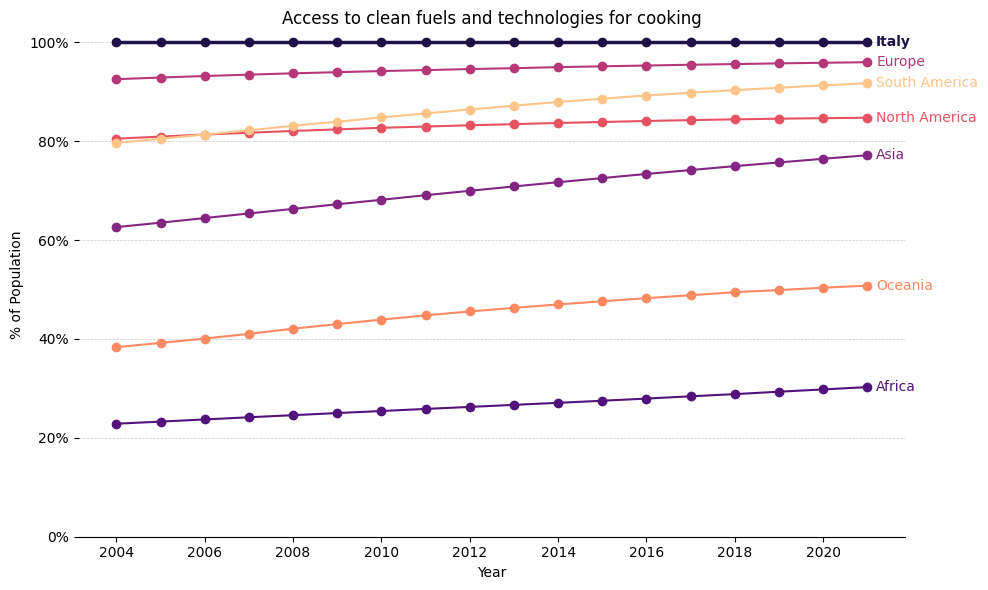

In [8]:
indicator = "Access to clean fuels and technologies for cooking (% of population)"

# Filter and prepare the data
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Compute the average value per continent per year
continent_means = df_valid.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Extract Italy's data as a separate copy
italy_data = df_valid[df_valid['Country Name'] == 'Italy'].copy()

# Convert all values to percentage format
continent_means.loc[:, indicator] = continent_means[indicator] * 100
italy_data.loc[:, indicator] = italy_data[indicator] * 100

# Palette
palette = sns.color_palette("magma", n_colors=len(continent_means['Continent'].unique()) + 1)
entities = ['Italy'] + list(continent_means['Continent'].unique())
color_map = dict(zip(entities, palette))

plt.figure(figsize=(10, 6))

# Linee dei continenti
for continent in continent_means['Continent'].unique():
    subset = continent_means[continent_means['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=color_map[continent], marker='o')
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0],
            continent,
            verticalalignment='center',
            color=color_map[continent]
        )

# Linea dell’Italia
plt.plot(
    italy_data['Year'],
    italy_data[indicator],
    linewidth=2.5,
    linestyle='-',
    marker='o',
    color=color_map['Italy']
)
plt.text(
    italy_data['Year'].max() + 0.2,
    italy_data[indicator].iloc[-1],
    'Italy',
    verticalalignment='center',
    fontweight='bold',
    color=color_map['Italy']
)

plt.title("Access to clean fuels and technologies for cooking")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 102)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)  # rimuove l'asse Y
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

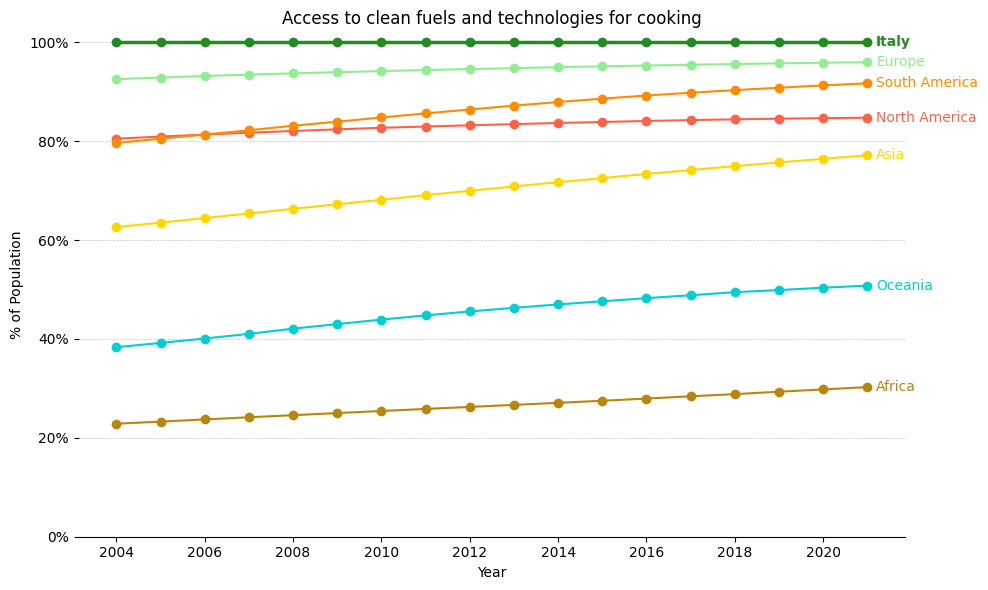

In [9]:
indicator = "Access to clean fuels and technologies for cooking (% of population)"

# Filter and prepare the data
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Compute the average value per continent per year
continent_means = df_valid.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Extract Italy's data as a separate copy
italy_data = df_valid[df_valid['Country Name'] == 'Italy'].copy()

# Convert all values to percentage format
continent_means[indicator] = continent_means[indicator] * 100
italy_data[indicator] = italy_data[indicator] * 100

# Custom color palette
custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

plt.figure(figsize=(10, 6))

# Plot lines for each continent
for continent in continent_means['Continent'].unique():
    subset = continent_means[continent_means['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=custom_colors[continent], marker='o')
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0],
            continent,
            verticalalignment='center',
            color=custom_colors[continent]
        )

# Plot Italy separately
plt.plot(
    italy_data['Year'],
    italy_data[indicator],
    linewidth=2.5,
    linestyle='-',
    marker='o',
    color=custom_colors['Italy']
)
plt.text(
    italy_data['Year'].max() + 0.2,
    italy_data[indicator].iloc[-1],
    'Italy',
    verticalalignment='center',
    fontweight='bold',
    color=custom_colors['Italy']
)

plt.title("Access to clean fuels and technologies for cooking")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 102)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


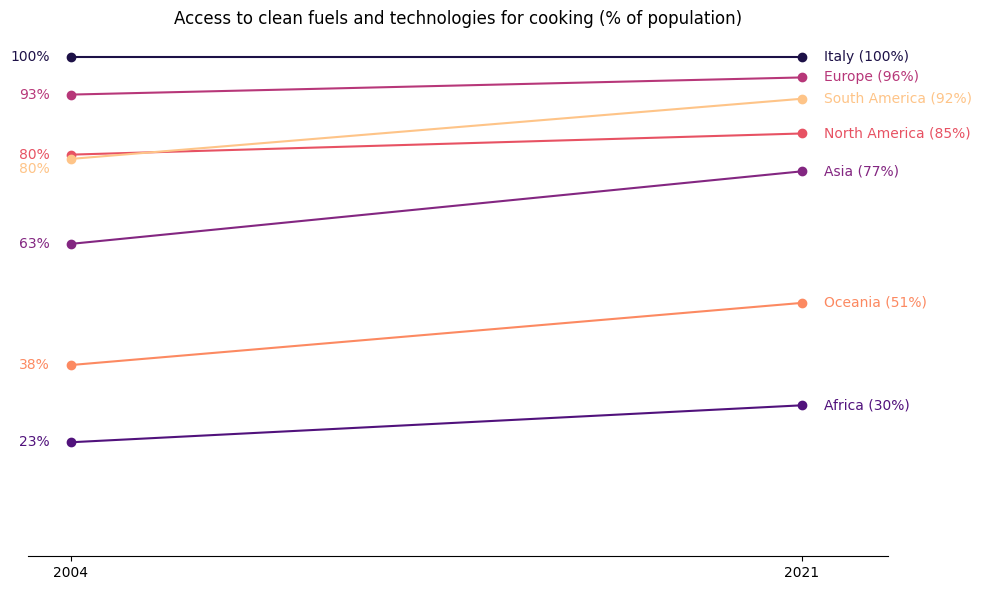

In [11]:
indicator = "Access to clean fuels and technologies for cooking (% of population)"
years_slope = [2004, 2021]

# Filtra i dati validi
df_valid_cleanfuels = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid_cleanfuels = df_valid_cleanfuels.dropna(subset=[indicator])
df_valid_cleanfuels['Year'] = pd.to_numeric(df_valid_cleanfuels['Year'], errors='coerce')

df_slope_cf = df_valid_cleanfuels[df_valid_cleanfuels['Year'].isin(years_slope)].copy()

# Media per continente
continent_slope_cf = df_slope_cf.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Dati per l’Italia
italy_slope_cf = df_slope_cf[df_slope_cf['Country Name'] == 'Italy'][['Year', indicator]].copy()
italy_slope_cf['Continent'] = 'Italy'

# Unione e conversione in %
df_slope_all_cf = pd.concat([continent_slope_cf, italy_slope_cf], ignore_index=True)
df_slope_all_cf[indicator] *= 100

# Pivot
df_slope_pivot_cf = df_slope_all_cf.pivot(index='Continent', columns='Year', values=indicator).dropna()

# Palette coerente
entities_cf = ['Italy'] + list(continent_slope_cf['Continent'].unique())
palette_cf = sns.color_palette("magma", n_colors=len(entities_cf))
color_map_cf = dict(zip(entities_cf, palette_cf))

# Plot aggiornato con spostamento dell'etichetta sinistra di South America
plt.figure(figsize=(10, 6))

for idx in df_slope_pivot_cf.index:
    if idx == 'South America':
        offset_2021 = 0
        offset_2004 = -2
    else:
        offset_2021 = 0
        offset_2004 = 0

    plt.plot([2004, 2021], df_slope_pivot_cf.loc[idx], marker='o', label=idx, color=color_map_cf.get(idx, 'gray'))

    plt.text(
        2021 + 0.5,
        df_slope_pivot_cf.loc[idx, 2021] + offset_2021,
        f"{idx} ({int(round(df_slope_pivot_cf.loc[idx, 2021]))}%)",
        va='center',
        color=color_map_cf.get(idx, 'gray')
    )
    plt.text(
        2004 - 0.5,
        df_slope_pivot_cf.loc[idx, 2004] + offset_2004,
        f"{int(round(df_slope_pivot_cf.loc[idx, 2004]))}%",
        va='center',
        ha='right',
        color=color_map_cf.get(idx, 'gray')
    )

plt.xticks([2004, 2021])
plt.xlim(2003, 2023)
plt.title("Access to clean fuels and technologies for cooking (% of population)")
plt.ylim(0, 105)
plt.yticks([])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

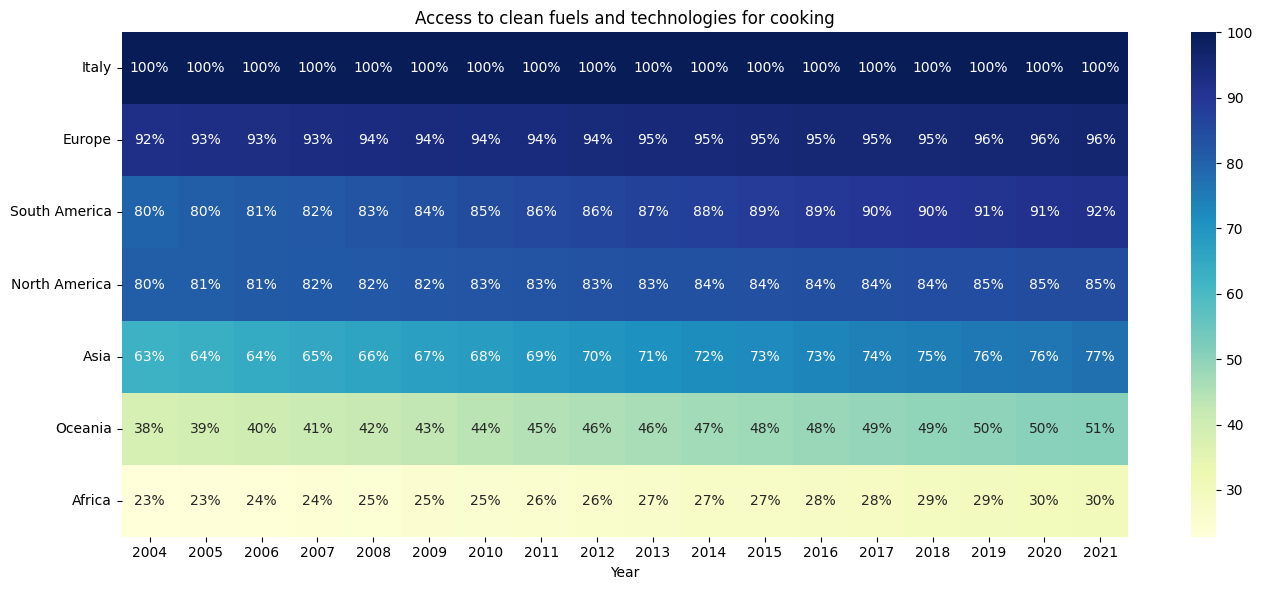

In [41]:
# Nome dell'indicatore da visualizzare
indicator = "Access to clean fuels and technologies for cooking (% of population)"

# Filtro e pulizia dei dati
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')
df_valid[indicator] = df_valid[indicator] * 100  # converti in percentuale

# Crea una colonna 'Entity' per trattare l'Italia separatamente
df_valid['Entity'] = df_valid['Continent']
df_valid.loc[df_valid['Country Name'] == 'Italy', 'Entity'] = 'Italy'

# Raggruppa per entità e anno
heatmap_df = df_valid.groupby(['Entity', 'Year'])[indicator].mean().reset_index()

# Crea matrice per heatmap
heatmap_matrix = heatmap_df.pivot(index='Entity', columns='Year', values=indicator)

# Ordina per media decrescente
entity_means = heatmap_matrix.mean(axis=1).sort_values(ascending=False)
heatmap_matrix_sorted = heatmap_matrix.loc[entity_means.index]

# Crea la heatmap
plt.figure(figsize=(14, 6))
ax = sns.heatmap(
    heatmap_matrix_sorted,
    cmap='YlGnBu',
    annot=True,
    fmt=".0f",  # format base, lo sovrascriviamo sotto
    linewidths= 0,
    linecolor='gray',
)

# Aggiungi simbolo % a ogni annotazione
for text in ax.texts:
    val = text.get_text()
    text.set_text(f"{val}%")

# Titoli e layout
plt.title("Access to clean fuels and technologies for cooking")
plt.xlabel("Year")
plt.ylabel("")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

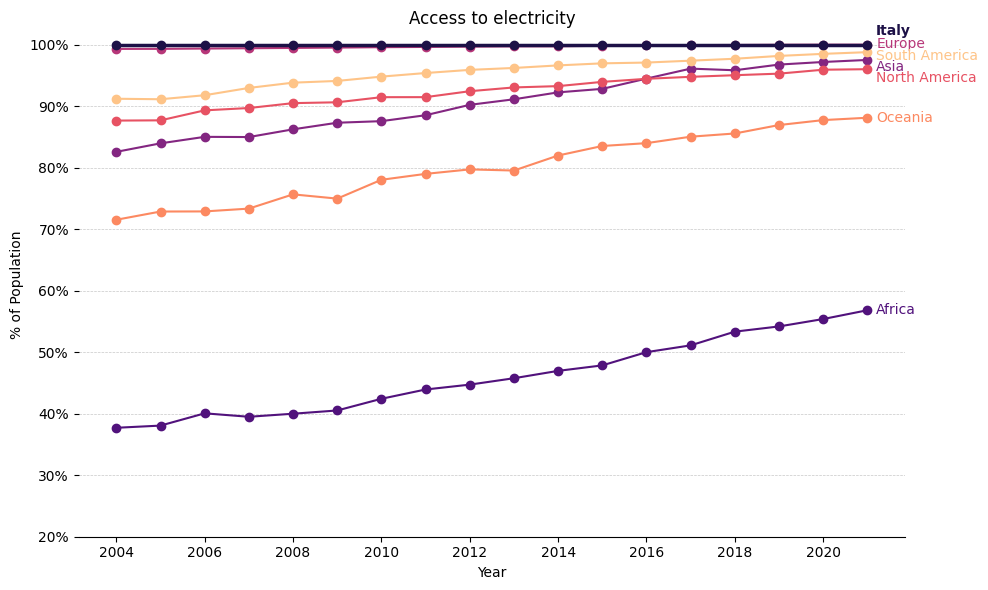

In [12]:
# LINE CHART: Access to electricity – 2004–2023

indicator = "Access to electricity (% of population)"

# Filter and prepare the data
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Compute the average value per continent per year
continent_means = df_valid.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Extract Italy's data as a separate copy
italy_data = df_valid[df_valid['Country Name'] == 'Italy'].copy()

# Convert all values to percentage format
continent_means.loc[:, indicator] = continent_means[indicator] * 100
italy_data.loc[:, indicator] = italy_data[indicator] * 100

palette = sns.color_palette("magma", n_colors=len(continent_means['Continent'].unique()) + 1)
entities = ['Italy'] + list(continent_means['Continent'].unique())
color_map = dict(zip(entities, palette))

# Copia del codice con distanziamento delle etichette per i continenti

# Palette già definita
indicator = "Access to electricity (% of population)"

# Filtra e prepara i dati
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Calcola media per continente e dati Italia
continent_means = df_valid.groupby(['Continent', 'Year'])[indicator].mean().reset_index()
italy_data = df_valid[df_valid['Country Name'] == 'Italy'].copy()
continent_means[indicator] *= 100
italy_data[indicator] *= 100

# Palette
palette = sns.color_palette("magma", n_colors=len(continent_means['Continent'].unique()) + 1)
entities = ['Italy'] + list(continent_means['Continent'].unique())
color_map = dict(zip(entities, palette))

# Offsets verticali per le etichette dei continenti
label_offsets = {
    'Africa': 0,
    'Asia': -1.1,
    'Europe': 0.1,
    'North America': -1.5,
    'Oceania': 0,
    'South America': -0.6
}

# Plot
plt.figure(figsize=(10, 6))
for continent in continent_means['Continent'].unique():
    subset = continent_means[continent_means['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=color_map[continent], marker='o')
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        offset = label_offsets.get(continent, 0)
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0] + offset,
            continent,
            verticalalignment='center',
            color=color_map[continent]
        )

# Linea Italia
plt.plot(
    italy_data['Year'],
    italy_data[indicator],
    linewidth=2.5,
    linestyle='-',
    marker='o',
    color=color_map['Italy']
)
plt.text(
    italy_data['Year'].max() + 0.2,
    italy_data[indicator].iloc[-1] + 1,
    'Italy',
    verticalalignment='bottom',
    fontweight='bold',
    color=color_map['Italy']
)

# Titoli e stile
plt.title("Access to electricity")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(20, 102)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

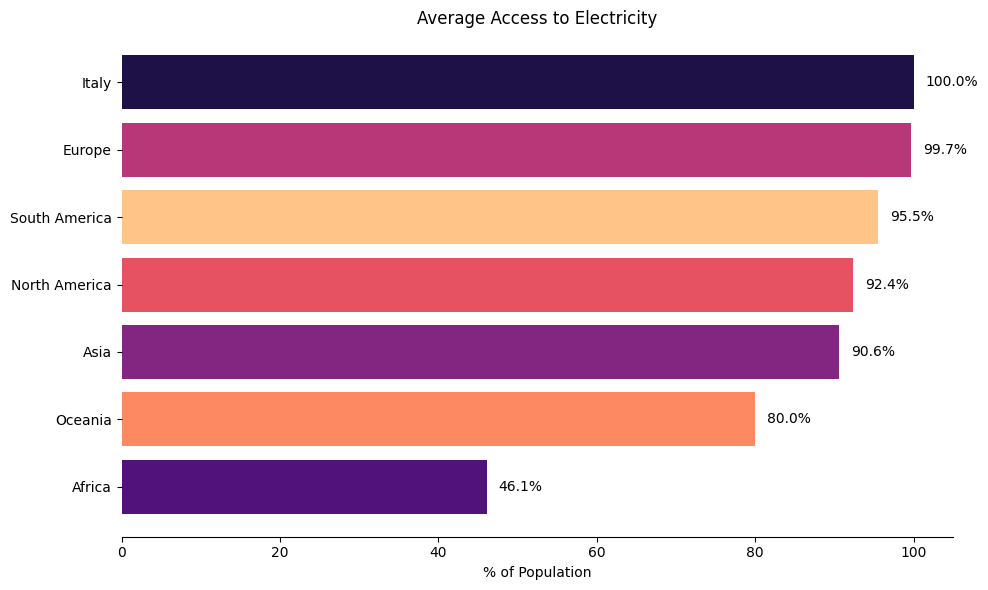

In [13]:
indicator = "Access to electricity (% of population)"

# Prepara i dati
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Calcola la media per ciascun continente su tutti gli anni disponibili
continent_avg_all_years = df_valid.groupby('Continent')[indicator].mean().reset_index()

# Calcola la media per l’Italia
italy_avg_value = df_valid[df_valid['Country Name'] == 'Italy'][indicator].mean()
italy_avg_row = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_avg_value]})

# Combina i dati
df_bar_avg = pd.concat([italy_avg_row, continent_avg_all_years], ignore_index=True)

# Ordina i valori
df_bar_avg_sorted = df_bar_avg.sort_values(by=indicator, ascending=True)

# Palette coerente
entities_avg = ['Italy'] + list(continent_avg_all_years['Continent'].unique())
palette_avg = sns.color_palette("magma", n_colors=len(entities_avg))
color_map_avg = dict(zip(entities_avg, palette_avg))
colors_avg = [color_map_avg[c] for c in df_bar_avg_sorted['Continent']]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_bar_avg_sorted['Continent'],
    df_bar_avg_sorted[indicator] * 100,
    color=colors_avg
)

# Etichette a destra
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1.5, bar.get_y() + bar.get_height() / 2, f"{xval:.1f}%", va='center')

# Stile grafico
plt.title("Average Access to Electricity")
plt.xlabel("% of Population")
plt.xlim(0, 105)

# Pulizia bordi
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

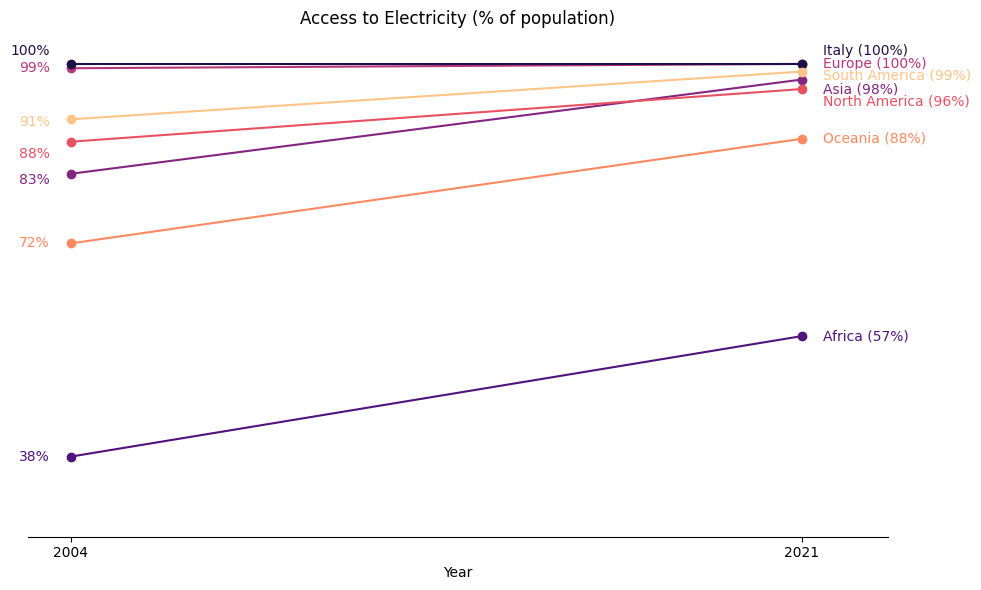

In [14]:
indicator = "Access to electricity (% of population)"
years_slope = [2004, 2021]

# Prepara i dati
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Filtra solo i due anni
df_slope = df_valid[df_valid['Year'].isin(years_slope)].copy()

# Media per continente
continent_slope = df_slope.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Dato Italia
italy_slope = df_slope[df_slope['Country Name'] == 'Italy'][['Year', indicator]].copy()
italy_slope['Continent'] = 'Italy'

# Combina dati
df_slope_all = pd.concat([continent_slope, italy_slope], ignore_index=True)
df_slope_all[indicator] *= 100  # percentuale

# Pivot per lo slope chart
df_slope_pivot = df_slope_all.pivot(index='Continent', columns='Year', values=indicator).dropna()

# Definisci la palette coerente
entities = ['Italy'] + list(continent_slope['Continent'].unique())
palette = sns.color_palette("magma", n_colors=len(entities))
color_map = dict(zip(entities, palette))

# Rigenerazione con offset specifico per Italia, North America e Oceania
plt.figure(figsize=(10, 6))

for idx in df_slope_pivot.index:
    # Traccia la linea
    plt.plot([2004, 2021], df_slope_pivot.loc[idx], marker='o', color=color_map.get(idx, 'gray'))

    if idx == 'Italy':
        offset_2021 = 2
        offset_2004 = 2
    elif idx == 'South America':
        offset_2021 = -0.7
        offset_2004 = -0.5
    elif idx == 'Asia':
        offset_2021 = -1.5
        offset_2004 = -1
    elif idx == 'North America':
        offset_2021 = -2
        offset_2004 = -2
    else:
        offset_2021 = 0
        offset_2004 = 0

    # Testo 2021
    plt.text(
        2021 + 0.5,
        df_slope_pivot.loc[idx, 2021] + offset_2021,
        f"{idx} ({int(round(df_slope_pivot.loc[idx, 2021]))}%)",
        va='center',
        color=color_map.get(idx, 'gray')
    )

    # Testo 2004
    plt.text(
        2004 - 0.5,
        df_slope_pivot.loc[idx, 2004] + offset_2004,
        f"{int(round(df_slope_pivot.loc[idx, 2004]))}%",
        va='center',
        ha='right',
        color=color_map.get(idx, 'gray')
    )

# Etichette asse X e stile
plt.xticks([2004, 2021])
plt.xlim(2003, 2023)
plt.title("Access to Electricity (% of population)")
plt.xlabel("Year")
plt.ylim(25, 105)
plt.yticks([])

# Pulizia bordi
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

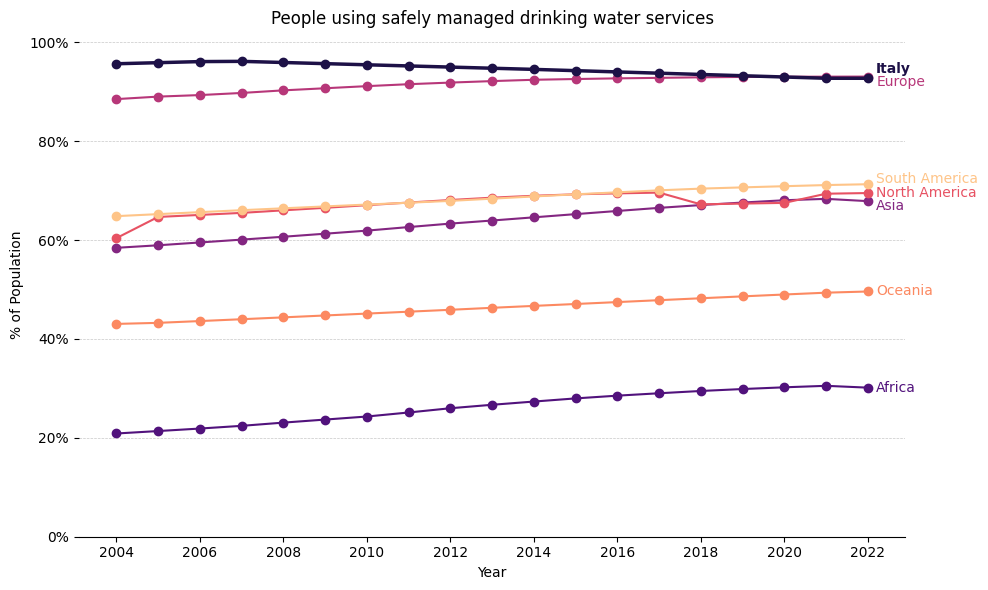

In [15]:
# LINE CHART: People using safely managed drinking water services (% of population) 

indicator = "People using safely managed drinking water services (% of population)"

# Filter and prepare the data
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Compute the average value per continent per year
continent_means = df_valid.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Extract Italy's data as a separate copy
italy_data = df_valid[df_valid['Country Name'] == 'Italy'].copy()

# Convert all values to percentage format
continent_means.loc[:, indicator] = continent_means[indicator] * 100
italy_data.loc[:, indicator] = italy_data[indicator] * 100

palette = sns.color_palette("magma", n_colors=len(continent_means['Continent'].unique()) + 1)
entities = ['Italy'] + list(continent_means['Continent'].unique())
color_map = dict(zip(entities, palette))

# Etichette distanziate manualmente per migliorare la leggibilità
offsets = {
    'Africa': 0,
    'Asia': -1,
    'Europe': -1,
    'North America': 0,
    'Oceania': 0,
    'South America': 1,
    'Italy': 0.5
}

plt.figure(figsize=(10, 6))

# Linee per i continenti
for continent in continent_means['Continent'].unique():
    subset = continent_means[continent_means['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=color_map[continent], marker='o')
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        offset = offsets.get(continent, 0)
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0] + offset,
            continent,
            verticalalignment='center',
            color=color_map[continent]
        )

# Linea Italia
plt.plot(
    italy_data['Year'],
    italy_data[indicator],
    linewidth=2.5,
    linestyle='-',
    marker='o',
    color=color_map['Italy']
)
plt.text(
    italy_data['Year'].max() + 0.2,
    italy_data[indicator].iloc[-1] + offsets['Italy'],
    'Italy',
    verticalalignment='bottom',
    fontweight='bold',
    color=color_map['Italy']
)

# Titoli e stile
plt.title("People using safely managed drinking water services")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 102)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

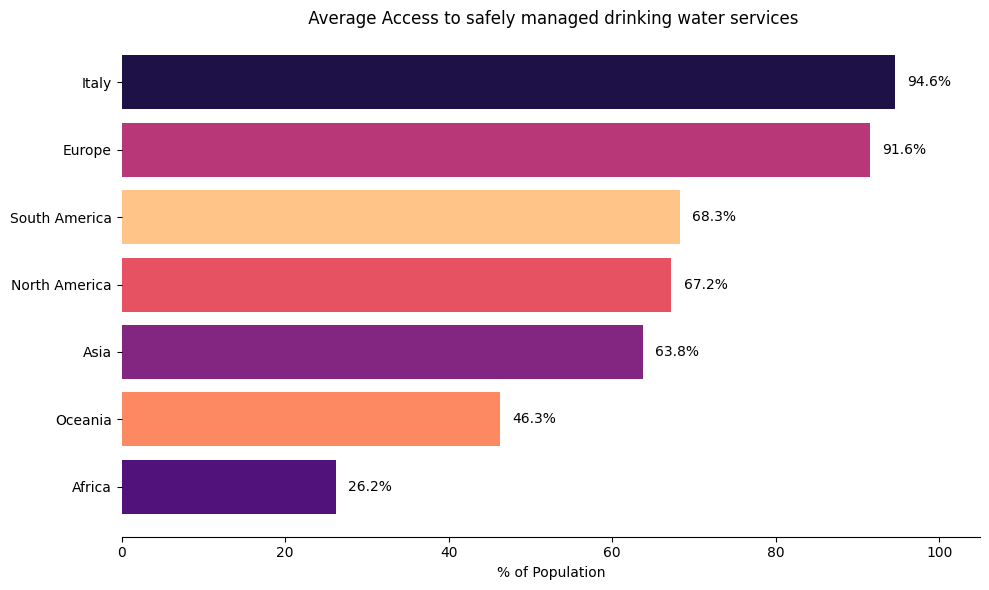

In [16]:
indicator = "People using safely managed drinking water services (% of population)"

# Prepara i dati
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Calcola la media per ciascun continente su tutti gli anni disponibili
continent_avg_all_years = df_valid.groupby('Continent')[indicator].mean().reset_index()

# Calcola la media per l’Italia
italy_avg_value = df_valid[df_valid['Country Name'] == 'Italy'][indicator].mean()
italy_avg_row = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_avg_value]})

# Combina i dati
df_bar_avg = pd.concat([italy_avg_row, continent_avg_all_years], ignore_index=True)

# Ordina i valori
df_bar_avg_sorted = df_bar_avg.sort_values(by=indicator, ascending=True)

# Palette coerente
entities_avg = ['Italy'] + list(continent_avg_all_years['Continent'].unique())
palette_avg = sns.color_palette("magma", n_colors=len(entities_avg))
color_map_avg = dict(zip(entities_avg, palette_avg))
colors_avg = [color_map_avg[c] for c in df_bar_avg_sorted['Continent']]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_bar_avg_sorted['Continent'],
    df_bar_avg_sorted[indicator] * 100,
    color=colors_avg
)

# Etichette a destra
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1.5, bar.get_y() + bar.get_height() / 2, f"{xval:.1f}%", va='center')

# Stile grafico
plt.title(" Average Access to safely managed drinking water services")
plt.xlabel("% of Population")
plt.xlim(0, 105)

# Pulizia bordi
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

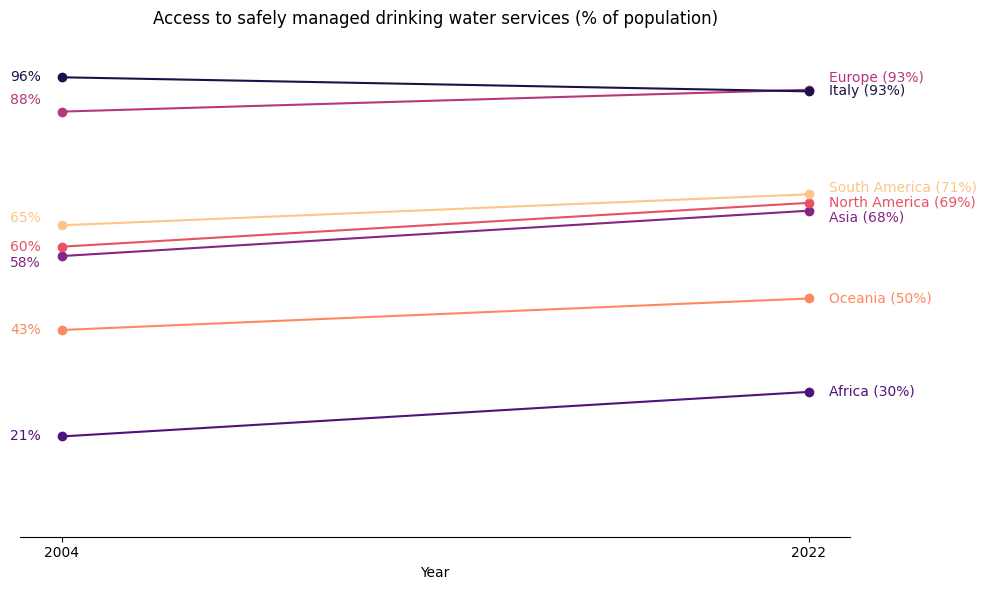

In [17]:
# Indicatore
indicator = "People using safely managed drinking water services (% of population)"
years_slope = [2004, 2022]

# Prepara i dati
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Filtra solo i due anni
df_slope = df_valid[df_valid['Year'].isin(years_slope)].copy()

# Media per continente
continent_slope = df_slope.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Dato Italia
italy_slope = df_slope[df_slope['Country Name'] == 'Italy'][['Year', indicator]].copy()
italy_slope['Continent'] = 'Italy'

# Combina dati
df_slope_all = pd.concat([continent_slope, italy_slope], ignore_index=True)
df_slope_all[indicator] = df_slope_all[indicator] * 100  # percentuale

# Pivot per lo slope chart
df_slope_pivot = df_slope_all.pivot(index='Continent', columns='Year', values=indicator).dropna()

# Definisci la palette coerente
entities = ['Italy'] + list(continent_slope['Continent'].unique())
palette = sns.color_palette("magma", n_colors=len(entities))
color_map = dict(zip(entities, palette))

# Plot slope chart
plt.figure(figsize=(10, 6))

for idx in df_slope_pivot.index:
    if idx == 'Europe':
        offset_2022 = 2.5
        offset_2004 = 2.5
    elif idx == 'South America':
        offset_2022 = 1.5
        offset_2004 = 1.5
    elif idx == 'Asia':
        offset_2022 = -1.5
        offset_2004 = -1.5
    else:
        offset_2022 = 0
        offset_2004 = 0

    plt.plot([2004, 2022], df_slope_pivot.loc[idx], marker='o', color=color_map.get(idx, 'gray'))

    plt.text(
        2022 + 0.5,
        df_slope_pivot.loc[idx, 2022] + offset_2022,
        f"{idx} ({int(round(df_slope_pivot.loc[idx, 2022]))}%)",
        va='center',
        color=color_map.get(idx, 'gray')
    )
    plt.text(
        2004 - 0.5,
        df_slope_pivot.loc[idx, 2004] + offset_2004,
        f"{int(round(df_slope_pivot.loc[idx, 2004]))}%",
        va='center',
        ha='right',
        color=color_map.get(idx, 'gray')
    )

# Personalizzazioni
plt.xticks([2004, 2022])
plt.xlim(2003, 2023)
plt.title("Access to safely managed drinking water services (% of population)")
plt.xlabel("Year")
plt.ylim(0, 105)
plt.yticks([])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

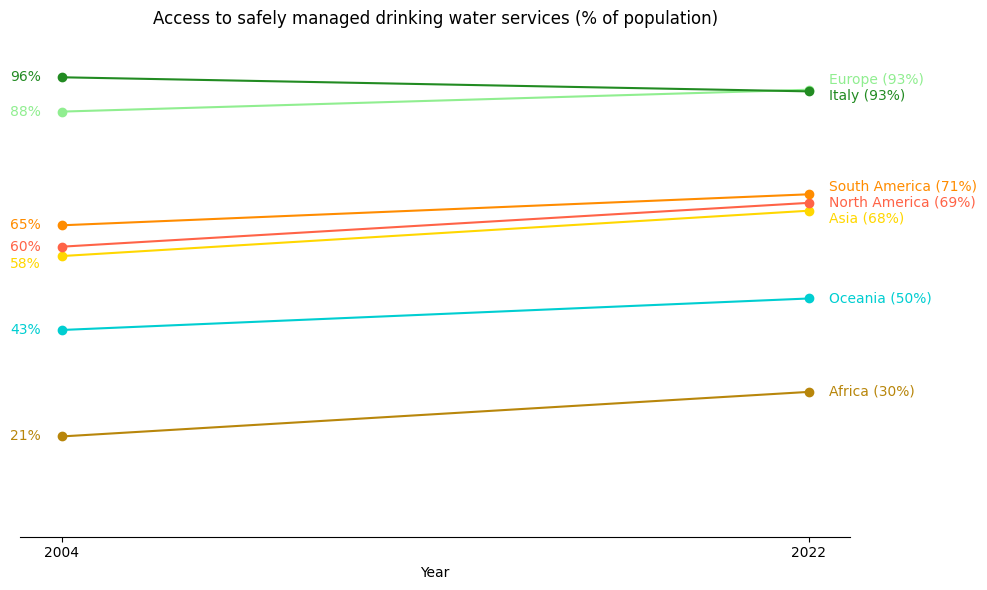

In [48]:
# === PARAMETRI ===
indicator = "People using safely managed drinking water services (% of population)"
years_slope = [2004, 2022]

# === PALETTE PERSONALIZZATA ===
custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# === PREPARAZIONE DATI ===
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid = df_valid.dropna(subset=[indicator])
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Filtra i due anni
df_slope = df_valid[df_valid['Year'].isin(years_slope)].copy()

# Media per continente
continent_slope = df_slope.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Dato per l'Italia
italy_slope = df_slope[df_slope['Country Name'] == 'Italy'][['Year', indicator]].copy()
italy_slope['Continent'] = 'Italy'

# Unione dati
df_slope_all = pd.concat([continent_slope, italy_slope], ignore_index=True)
df_slope_all[indicator] = df_slope_all[indicator] * 100  # Converti in %

# Pivot per slope chart
df_slope_pivot = df_slope_all.pivot(index='Continent', columns='Year', values=indicator).dropna()

# === SLOPE CHART ===
plt.figure(figsize=(10, 6))

for idx in df_slope_pivot.index:
    # Offsets per evitare sovrapposizioni
    if idx == 'Italy':
        offset_2022 = -1
        offset_2004 = 0
    elif idx == 'Europe':
        offset_2022 = 2
        offset_2004 = 0
    elif idx == 'South America':
        offset_2022 = 1.6
        offset_2004 = 0
    elif idx == 'Asia':
        offset_2022 = -1.6
        offset_2004 = -1.6
    else:
        offset_2022 = 0
        offset_2004 = 0

    # Linea
    plt.plot([2004, 2022], df_slope_pivot.loc[idx], marker='o', color=custom_colors.get(idx, 'gray'))

    # Etichette finali
    plt.text(
        2022 + 0.5,
        df_slope_pivot.loc[idx, 2022] + offset_2022,
        f"{idx} ({int(round(df_slope_pivot.loc[idx, 2022]))}%)",
        va='center',
        color=custom_colors.get(idx, 'gray')
    )
    plt.text(
        2004 - 0.5,
        df_slope_pivot.loc[idx, 2004] + offset_2004,
        f"{int(round(df_slope_pivot.loc[idx, 2004]))}%",
        va='center',
        ha='right',
        color=custom_colors.get(idx, 'gray')
    )

# === PERSONALIZZAZIONI GRAFICO ===
plt.xticks([2004, 2022])
plt.xlim(2003, 2023)
plt.title("Access to safely managed drinking water services (% of population)")
plt.xlabel("Year")
plt.ylim(0, 105)
plt.yticks([])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


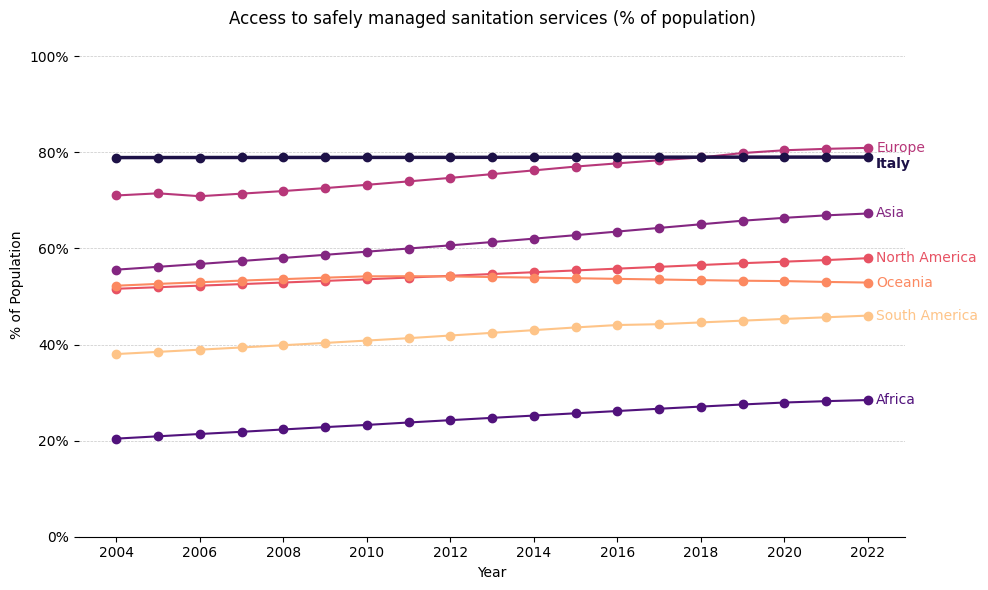

In [18]:
indicator = "People using safely managed sanitation services (% of population)"

# Prepara i dati
df_valid_sanitation = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid_sanitation = df_valid_sanitation.dropna(subset=[indicator])
df_valid_sanitation['Year'] = pd.to_numeric(df_valid_sanitation['Year'], errors='coerce')

# Media per continente e dati per Italia
continent_means_sanitation = df_valid_sanitation.groupby(['Continent', 'Year'])[indicator].mean().reset_index()
italy_data_sanitation = df_valid_sanitation[df_valid_sanitation['Country Name'] == 'Italy'].copy()

# Conversione in percentuale
continent_means_sanitation[indicator] *= 100
italy_data_sanitation[indicator] *= 100

# Palette coerente
entities = ['Italy'] + list(continent_means_sanitation['Continent'].unique())
palette = sns.color_palette("magma", n_colors=len(entities))
color_map = dict(zip(entities, palette))

# Plot
plt.figure(figsize=(10, 6))

for continent in continent_means_sanitation['Continent'].unique():
    subset = continent_means_sanitation[continent_means_sanitation['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=color_map[continent], marker='o')
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0],
            continent,
            verticalalignment='center',
            color=color_map[continent]
        )

plt.plot(
    italy_data_sanitation['Year'],
    italy_data_sanitation[indicator],
    linewidth=2.5,
    linestyle='-',
    marker='o',
    color=color_map['Italy']
)
plt.text(
    italy_data_sanitation['Year'].max() + 0.2,
    italy_data_sanitation[indicator].iloc[-1],
    'Italy',
    verticalalignment='top',
    fontweight='bold',
    color=color_map['Italy']
)

plt.title("Access to safely managed sanitation services (% of population)")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 105)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)  # rimuove l'asse Y
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

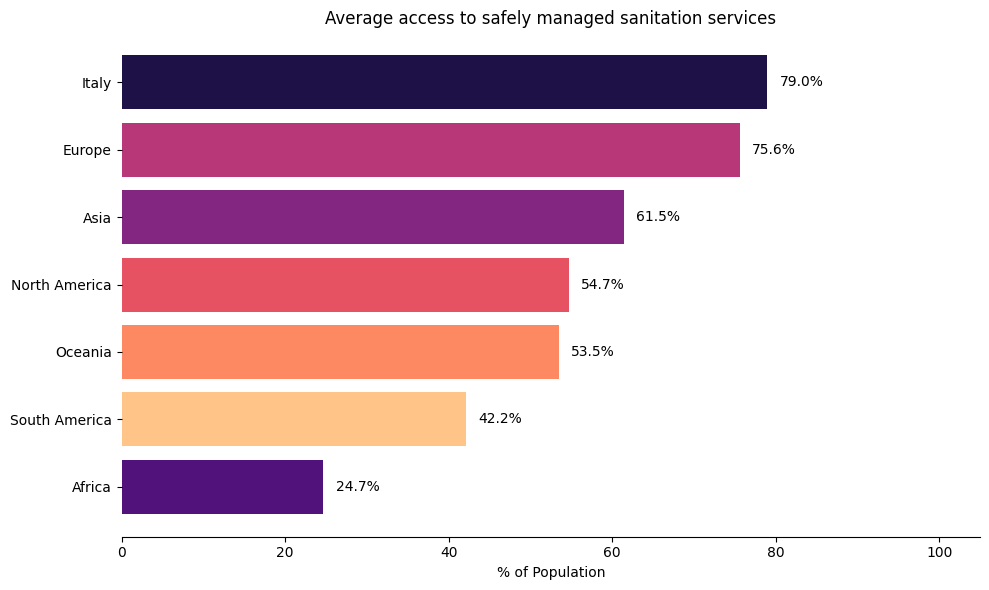

In [19]:
# Calcola la media per ciascun continente su tutti gli anni disponibili
continent_avg_all_years = df_valid_sanitation.groupby('Continent')[indicator].mean().reset_index()

# Calcola la media per l’Italia
italy_avg_value = df_valid_sanitation[df_valid_sanitation['Country Name'] == 'Italy'][indicator].mean()
italy_avg_row = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_avg_value]})

# Combina i dati
df_bar_avg = pd.concat([italy_avg_row, continent_avg_all_years], ignore_index=True)

# Ordina i valori
df_bar_avg_sorted = df_bar_avg.sort_values(by=indicator, ascending=True)

# Palette coerente
entities_avg = ['Italy'] + list(continent_avg_all_years['Continent'].unique())
palette_avg = sns.color_palette("magma", n_colors=len(entities_avg))
color_map_avg = dict(zip(entities_avg, palette_avg))
colors_avg = [color_map_avg[c] for c in df_bar_avg_sorted['Continent']]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_bar_avg_sorted['Continent'],
    df_bar_avg_sorted[indicator] * 100,
    color=colors_avg
)

# Etichette a destra
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1.5, bar.get_y() + bar.get_height() / 2, f"{xval:.1f}%", va='center')

# Stile grafico
plt.title("Average access to safely managed sanitation services")
plt.xlabel("% of Population")
plt.xlim(0, 105)

# Pulizia bordi
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

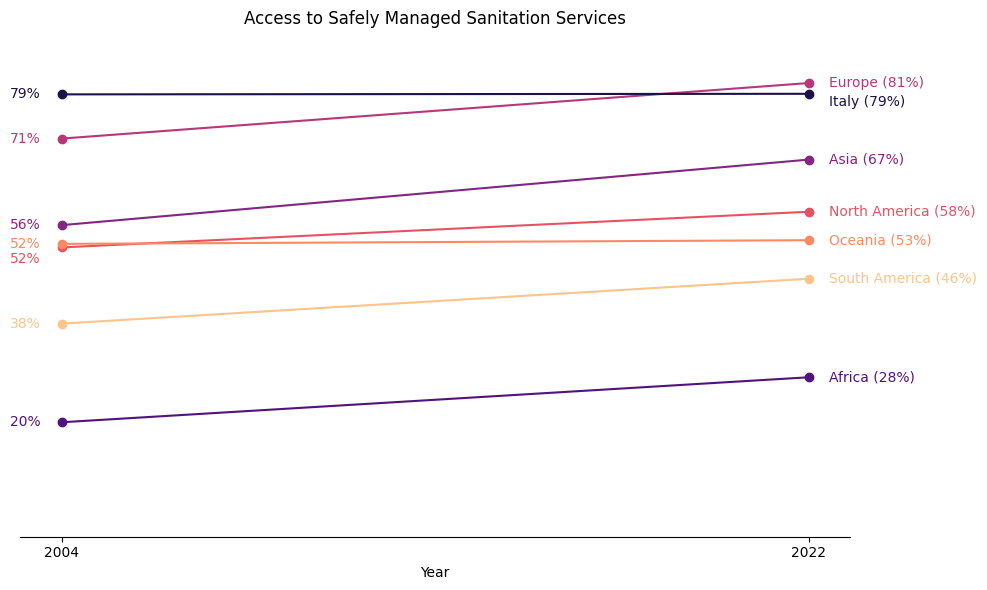

In [20]:
indicator = "People using safely managed sanitation services (% of population)"
years_slope = [2004, 2022]

# Prepara i dati
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].dropna()
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')
df_slope = df_valid[df_valid['Year'].isin(years_slope)].copy()

# Media per continente
continent_slope = df_slope.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Dato per l’Italia
italy_slope = df_slope[df_slope['Country Name'] == 'Italy'][['Year', indicator]].copy()
italy_slope['Continent'] = 'Italy'

# Unione e conversione in percentuale
df_slope_all = pd.concat([continent_slope, italy_slope], ignore_index=True)
df_slope_all[indicator] *= 100

# Pivot
df_slope_pivot = df_slope_all.pivot(index='Continent', columns='Year', values=indicator).dropna()

# Palette coerente
entities = ['Italy'] + list(continent_slope['Continent'].unique())
palette = sns.color_palette("magma", n_colors=len(entities))
color_map = dict(zip(entities, palette))

# Plot con offset mirati
plt.figure(figsize=(10, 6))
for idx in df_slope_pivot.index:
    if idx == 'Italy':
        offset_2022 = -1.5
        offset_2004 = 0
    elif idx == 'North America':
        offset_2022 = 0
        offset_2004 = -2
    else:
        offset_2022 = 0
        offset_2004 = 0

    plt.plot([2004, 2022], df_slope_pivot.loc[idx], marker='o', color=color_map.get(idx, 'gray'))

    # Etichetta destra (2022)
    plt.text(
        2022 + 0.5,
        df_slope_pivot.loc[idx, 2022] + offset_2022,
        f"{idx} ({int(round(df_slope_pivot.loc[idx, 2022]))}%)",
        va='center',
        color=color_map.get(idx, 'gray')
    )

    # Etichetta sinistra (2004)
    plt.text(
        2004 - 0.5,
        df_slope_pivot.loc[idx, 2004] + offset_2004,
        f"{int(round(df_slope_pivot.loc[idx, 2004]))}%",
        va='center',
        ha='right',
        color=color_map.get(idx, 'gray')
    )

# Stile finale
plt.xticks([2004, 2022])
plt.xlim(2003, 2023)
plt.title("Access to Safely Managed Sanitation Services")
plt.xlabel("Year")
plt.ylim(0, 90)
plt.yticks([])
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tight_layout()
plt.show()


# Access to essential services

In [21]:
# Definizione degli indicatori di accesso ai servizi
service_indicators = [
    "Access to clean fuels and technologies for cooking (% of population)",
    "Access to electricity (% of population)",
    "People using safely managed drinking water services (% of population)",
    "People using safely managed sanitation services (% of population)"
]

# Verifica che tutte le colonne siano presenti nel dataset
available_columns = [col for col in service_indicators if col in df.columns]

# Prepara il DataFrame con i dati rilevanti
df_services = df[['Country Name', 'Continent', 'Year'] + available_columns].copy()
df_services = df_services.dropna(subset=available_columns)
df_services['Year'] = pd.to_numeric(df_services['Year'], errors='coerce')

# Calcola l'indice aggregato come media dei 4 indicatori
df_services["Access to essential services (% of population)"] = df_services[available_columns].mean(axis=1) * 100

df_services[['Country Name', 'Continent', 'Year', "Access to essential services (% of population)"]].head()

Country Name Continent  Year  \
20      Albania    Europe  2004   
21      Albania    Europe  2005   
22      Albania    Europe  2006   
23      Albania    Europe  2007   
24      Albania    Europe  2008   

    Access to essential services (% of population)  
20                                       57.041304  
21                                       58.410757  
22                                       59.795428  
23                                       61.236447  
24                                       62.786673

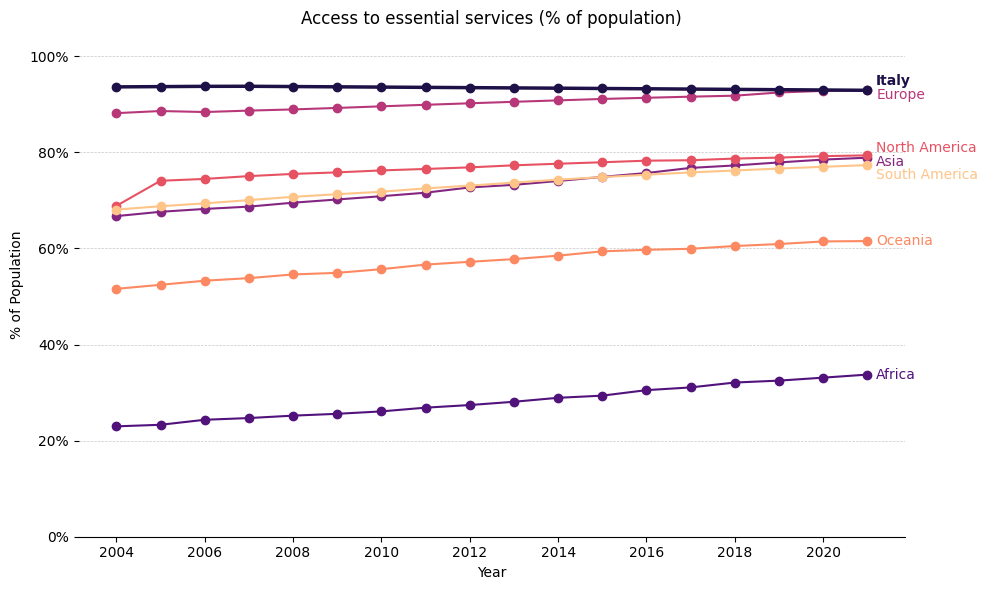

In [22]:
indicator = "Access to essential services (% of population)"

# Media per continente nel tempo
continent_means_access = df_services.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Dati per l’Italia
italy_data_access = df_services[df_services['Country Name'] == 'Italy'].copy()

# Palette coerente
entities = ['Italy'] + list(continent_means_access['Continent'].unique())
palette = sns.color_palette("magma", n_colors=len(entities))
color_map = dict(zip(entities, palette))

# Plot
plt.figure(figsize=(10, 6))

for continent in continent_means_access['Continent'].unique():
    subset = continent_means_access[continent_means_access['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], color=color_map[continent], marker='o')

    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        offset = 0
        if continent == 'Europe':
            offset = -1
        elif continent == 'North America':
            offset = 1.5
        elif continent == 'Asia':
            offset = -1
        elif continent == 'South America':
            offset = -2

        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0] + offset,
            continent,
            verticalalignment='center',
            color=color_map[continent]
        )

# Italia
plt.plot(
    italy_data_access['Year'],
    italy_data_access[indicator],
    linewidth=2.5,
    linestyle='-',
    marker='o',
    color=color_map['Italy']
)
plt.text(
    italy_data_access['Year'].max() + 0.2,
    italy_data_access[indicator].iloc[-1] + 2,
    'Italy',
    verticalalignment='center',
    fontweight='bold',
    color=color_map['Italy']
)

# Titolo e assi
plt.title("Access to essential services (% of population)")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 105)

plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)  # rimuove l'asse Y
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

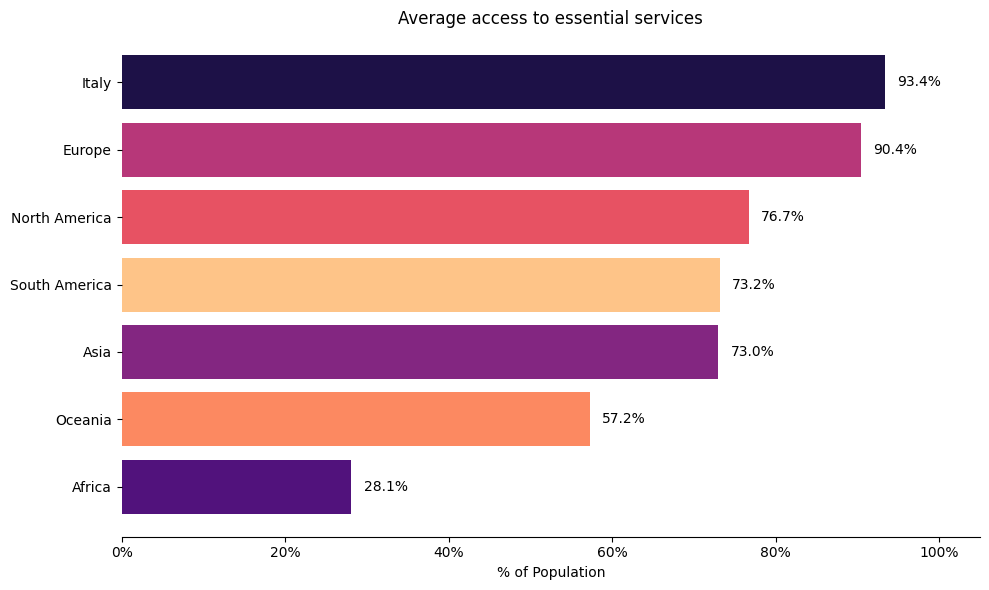

In [23]:
# Calcola la media per ciascun continente su tutti gli anni disponibili
continent_avg_all_years = df_services.groupby('Continent')["Access to essential services (% of population)"].mean().reset_index()

# Calcola la media per l’Italia
italy_avg_value = df_services[df_services['Country Name'] == 'Italy']["Access to essential services (% of population)"].mean()
italy_avg_row = pd.DataFrame({'Continent': ['Italy'], "Access to essential services (% of population)": [italy_avg_value]})

# Combina i dati
df_bar_avg = pd.concat([italy_avg_row, continent_avg_all_years], ignore_index=True)

# Ordina i valori
df_bar_avg_sorted = df_bar_avg.sort_values(by="Access to essential services (% of population)", ascending=True)

# Palette coerente
entities_avg = ['Italy'] + list(continent_avg_all_years['Continent'].unique())
palette_avg = sns.color_palette("magma", n_colors=len(entities_avg))
color_map_avg = dict(zip(entities_avg, palette_avg))
colors_avg = [color_map_avg[c] for c in df_bar_avg_sorted['Continent']]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_bar_avg_sorted['Continent'],
    df_bar_avg_sorted["Access to essential services (% of population)"],
    color=colors_avg
)

# Etichette a destra
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1.5, bar.get_y() + bar.get_height() / 2, f"{xval:.1f}%", va='center')

# Stile grafico
plt.title("Average access to essential services")
plt.xlabel("% of Population")
plt.xlim(0, 105)

# Pulizia bordi
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))

plt.tight_layout()
plt.show()


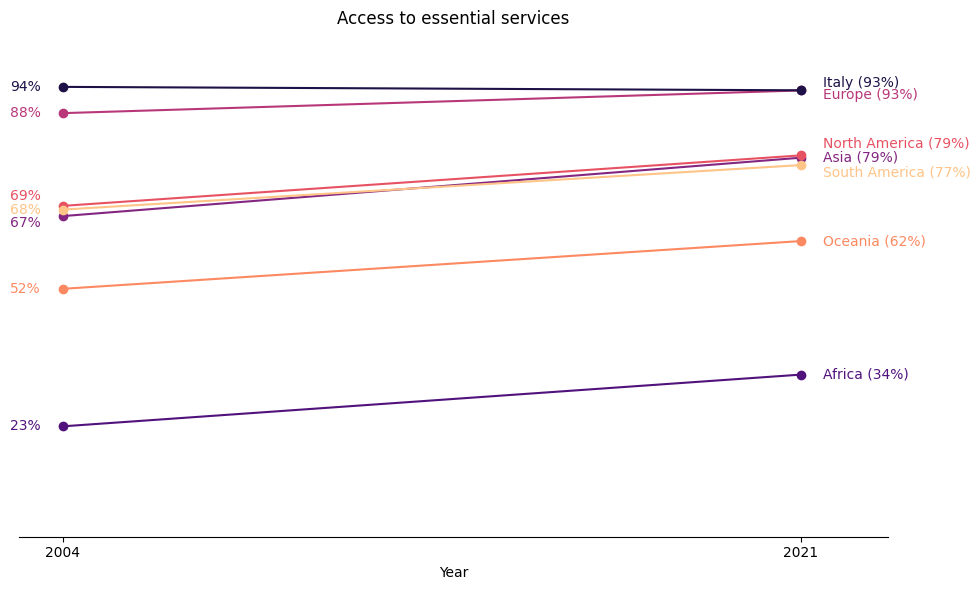

In [24]:
indicator = "Access to essential services (% of population)"
years_slope = [2004, 2021]

# Filtra i dati per i due anni
df_slope = df_services[df_services['Year'].isin(years_slope)].copy()
continent_slope = df_slope.groupby(['Continent', 'Year'])[indicator].mean().reset_index()
italy_slope = df_slope[df_slope['Country Name'] == 'Italy'][['Year', indicator]].copy()
italy_slope['Continent'] = 'Italy'
df_slope_all = pd.concat([continent_slope, italy_slope], ignore_index=True)

# Pivot 
df_slope_pivot = df_slope_all.pivot(index='Continent', columns='Year', values=indicator).dropna()
df_slope_pivot.columns = df_slope_pivot.columns.astype(int)

# Plot slope chart 2004–2021
plt.figure(figsize=(10, 6))

for idx in df_slope_pivot.index:
    if idx == 'Italy':
        offset_2021 = 1.5
        offset_2004 = 0
    elif idx == 'Europe':
        offset_2021 = -1
        offset_2004 = 0
    elif idx == 'North America':
        offset_2021 = 2.5
        offset_2004 = 2
    elif idx == 'Asia':
        offset_2021 = 0
        offset_2004 = -1.5
    elif idx == 'South America':
        offset_2021 = -1.5
        offset_2004 = 0
    else:
        offset_2021 = 0
        offset_2004 = 0

    plt.plot([2004, 2021], df_slope_pivot.loc[idx], marker='o', color=color_map.get(idx, 'gray'))

    # Etichetta 2021
    plt.text(
        2021 + 0.5,
        df_slope_pivot.loc[idx, 2021] + offset_2021,
        f"{idx} ({int(round(df_slope_pivot.loc[idx, 2021]))}%)",
        va='center',
        color=color_map.get(idx, 'gray')
    )

    # Etichetta 2004
    plt.text(
        2004 - 0.5,
        df_slope_pivot.loc[idx, 2004] + offset_2004,
        f"{int(round(df_slope_pivot.loc[idx, 2004]))}%",
        va='center',
        ha='right',
        color=color_map.get(idx, 'gray')
    )

# Finalizzazione grafico
plt.xticks([2004, 2021])
plt.xlim(2003, 2023)
plt.title("Access to essential services")
plt.xlabel("Year")
plt.ylim(0, 105)
plt.yticks([])

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

# Poverty and Inequality

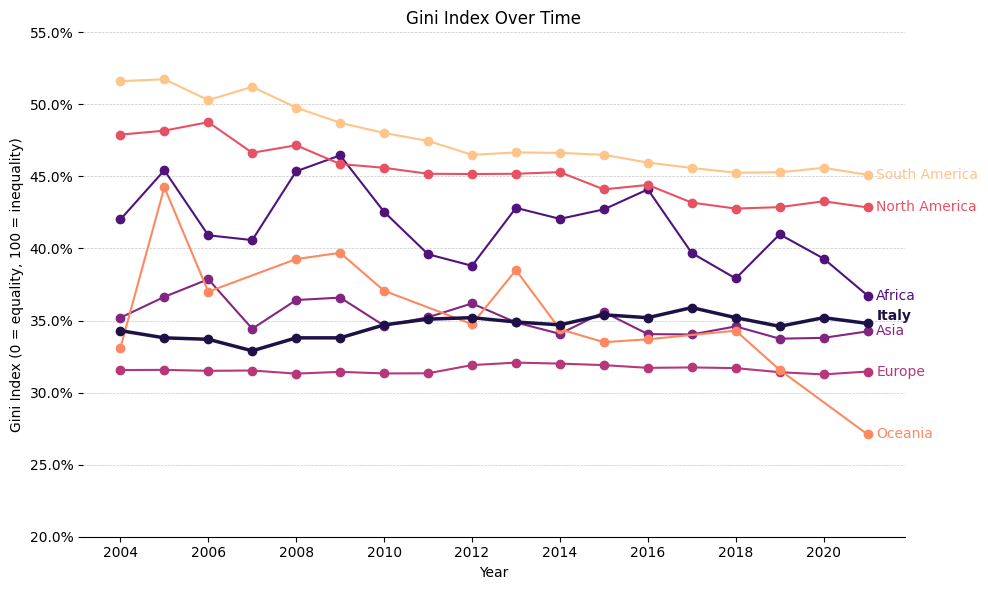

In [25]:
indicator = "Gini index"

# Prepara i dati
df_valid_gini = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid_gini = df_valid_gini.dropna(subset=[indicator])
df_valid_gini['Year'] = pd.to_numeric(df_valid_gini['Year'], errors='coerce')

df_valid_gini = df_valid_gini[df_valid_gini['Year'] <= 2021]

# Media per continente e dati Italia
continent_means_gini = df_valid_gini.groupby(['Continent', 'Year'])[indicator].mean().reset_index()
italy_data_gini = df_valid_gini[df_valid_gini['Country Name'] == 'Italy'].copy()

# Palette coerente
entities_gini = ['Italy'] + list(continent_means_gini['Continent'].unique())
palette_gini = sns.color_palette("magma", n_colors=len(entities_gini))
color_map_gini = dict(zip(entities_gini, palette_gini))

# ---- LINE CHART GINI INDEX (2004–2023) ----
plt.figure(figsize=(10, 6))

for continent in continent_means_gini['Continent'].unique():
    subset = continent_means_gini[continent_means_gini['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=color_map_gini[continent], marker='o')
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0],
            continent,
            verticalalignment='center',
            color=color_map_gini[continent]
        )

plt.plot(
    italy_data_gini['Year'],
    italy_data_gini[indicator],
    linewidth=2.5,
    linestyle='-',
    marker='o',
    color=color_map_gini['Italy']
)
plt.text(
    italy_data_gini['Year'].max() + 0.2,
    italy_data_gini[indicator].iloc[-1],
    'Italy',
    verticalalignment='bottom',
    fontweight='bold',
    color=color_map_gini['Italy']
)

plt.title("Gini Index Over Time")
plt.xlabel("Year")
plt.ylabel("Gini Index (0 = equality, 100 = inequality)")
plt.ylim(20, 55)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)  # rimuove l'asse Y
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

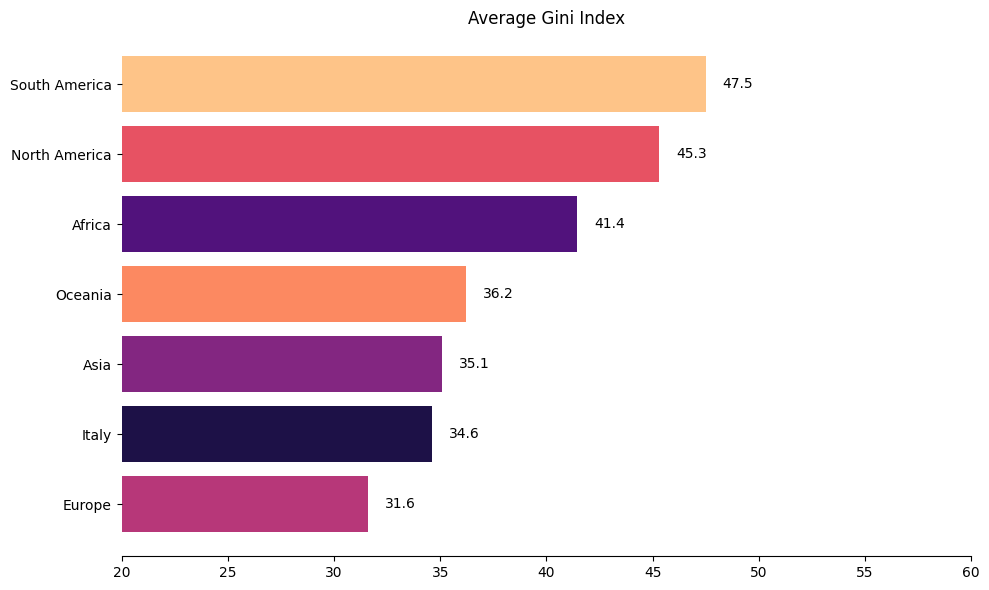

In [26]:
indicator = "Gini index"

# Prepara i dati
df_valid_gini = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid_gini = df_valid_gini.dropna(subset=[indicator])
df_valid_gini['Year'] = pd.to_numeric(df_valid_gini['Year'], errors='coerce')

# Media per continente su tutti gli anni
continent_avg_all_gini = df_valid_gini.groupby('Continent')[indicator].mean().reset_index()

# Media per l’Italia
italy_avg_value_gini = df_valid_gini[df_valid_gini['Country Name'] == 'Italy'][indicator].mean()
italy_row_avg_gini = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_avg_value_gini]})

# Unione e ordinamento
df_bar_avg_gini = pd.concat([italy_row_avg_gini, continent_avg_all_gini], ignore_index=True)
df_bar_sorted_avg_gini = df_bar_avg_gini.sort_values(by=indicator, ascending=True)

# Crea color map coerente
entities_gini = ['Italy'] + list(continent_avg_all_gini['Continent'].unique())
palette_gini = sns.color_palette("magma", n_colors=len(entities_gini))
color_map_gini = dict(zip(entities_gini, palette_gini))

# Colori ordinati
ordered_labels_avg = df_bar_sorted_avg_gini['Continent'].tolist()
bar_colors_avg = [color_map_gini[label] for label in ordered_labels_avg]

# Plot aggiornato
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_bar_sorted_avg_gini['Continent'],
    df_bar_sorted_avg_gini[indicator],
    color=bar_colors_avg
)

# Etichette a destra delle barre
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.8, bar.get_y() + bar.get_height() / 2, f"{xval:.1f}", va='center')

# Stile
plt.title("Average Gini Index")
plt.xlim(20, 60)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


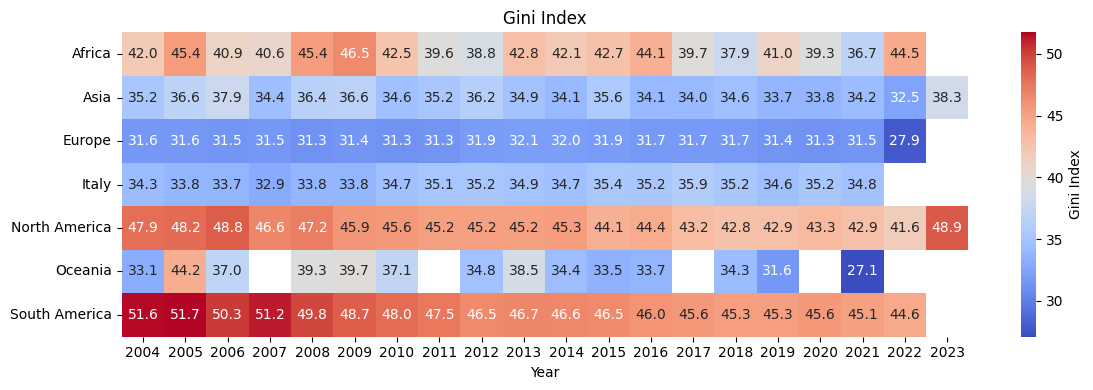

In [27]:
# Preparazione dei dati per heatmap con Italia e continenti
# Calcola media per continente e unisci Italia
continent_year_gini = df_valid_gini.groupby(['Continent', 'Year'])[indicator].mean().reset_index()
italy_year_gini = df_valid_gini[df_valid_gini['Country Name'] == 'Italy'][['Year', indicator]].copy()
italy_year_gini['Continent'] = 'Italy'

# Combina i dati
heatmap_df = pd.concat([continent_year_gini, italy_year_gini], ignore_index=True)

# Pivot: righe = Continent/Italy, colonne = Year, valori = Gini Index
heatmap_data_ci = heatmap_df.pivot(index='Continent', columns='Year', values=indicator)

# Plot della heatmap
plt.figure(figsize=(12, 4))
sns.heatmap(
    heatmap_data_ci,
    cmap="coolwarm",
    linewidths=0,
    linecolor=None,
    cbar_kws={'label': 'Gini Index'},
    square=False,
    annot=True,
    fmt=".1f"
)

plt.title("Gini Index")
plt.xlabel("Year")
plt.ylabel("")
plt.tight_layout()
plt.show()

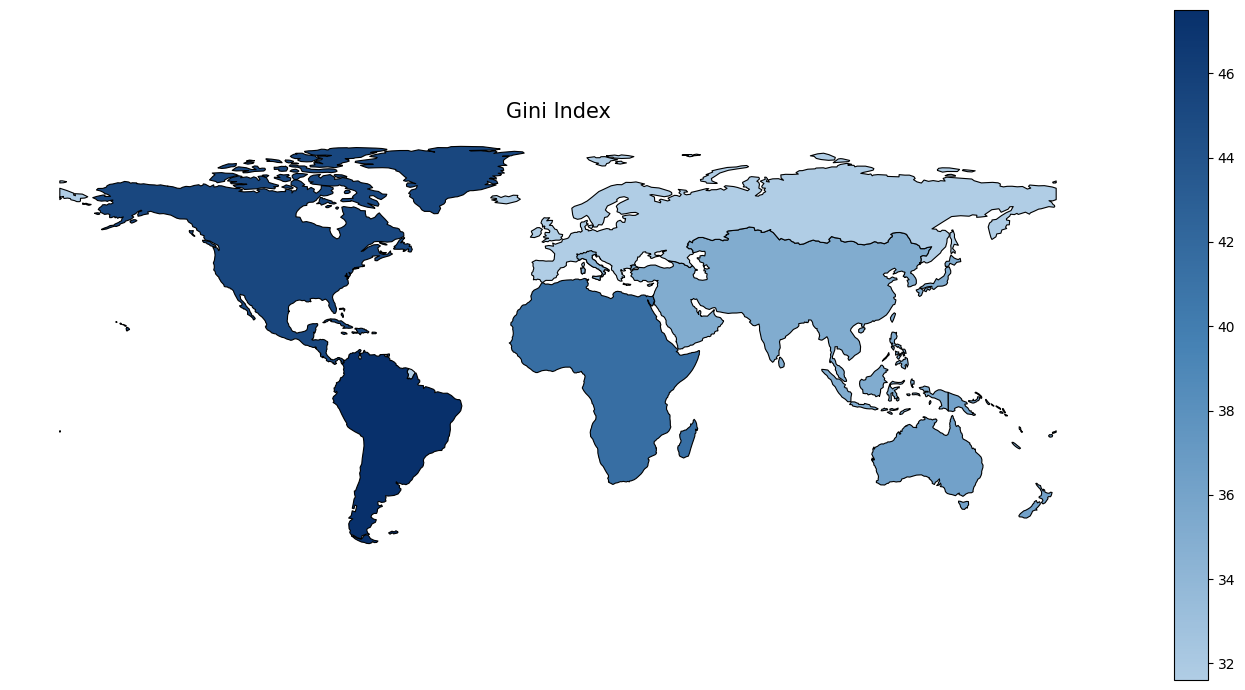

In [49]:
indicator = "Gini index"
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].dropna()
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Calcola media per continente
continent_avg = df_valid.groupby('Continent')[indicator].mean().reset_index()

# Calcola media per Italia
italy_value = df_valid[df_valid['Country Name'] == 'Italy'][indicator].mean()
italy_row = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_value]})

# Combina Italia + Continenti
df_plot = pd.concat([continent_avg, italy_row], ignore_index=True)

# === 3. Carica shapefile mondo da Natural Earth ===
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Mappa continenti da GeoPandas a ESG
continent_map = {
    'Africa': 'Africa',
    'Asia': 'Asia',
    'Europe': 'Europe',
    'North America': 'North America',
    'South America': 'South America',
    'Oceania': 'Oceania'
}
world['Continent'] = world['CONTINENT'].map(lambda x: continent_map.get(x, None))

# Raggruppa per continente
gdf_continents = world.dissolve(by='Continent', as_index=False)
gdf_continents = gdf_continents.merge(df_plot, on='Continent', how='left')

# Estrai geometria dell’Italia
gdf_italy = world[world['NAME'] == 'Italy'].copy()
gdf_italy['Continent'] = 'Italy'
gdf_italy[indicator] = italy_value

# Combina tutto
gdf_final = pd.concat([gdf_continents, gdf_italy], ignore_index=True)
gdf_final = gpd.GeoDataFrame(gdf_final)

# Centroidi per etichette
gdf_final['centroid'] = gdf_final.geometry.representative_point()

from matplotlib.colors import LinearSegmentedColormap

# Palette blu profondo → chiaro
monochrome_cmap = LinearSegmentedColormap.from_list(
    "mono_deepblue",
    ["#b0cde5", "#4682b4", "#08306b"])

# === 4. Plotta la mappa ===
fig, ax = plt.subplots(figsize=(14, 7))
gdf_final.plot(
    column=indicator,
    cmap=monochrome_cmap,
    legend=True,
    linewidth=0.8,
    edgecolor='black',
    ax=ax
)

ax.set_title("Gini Index", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

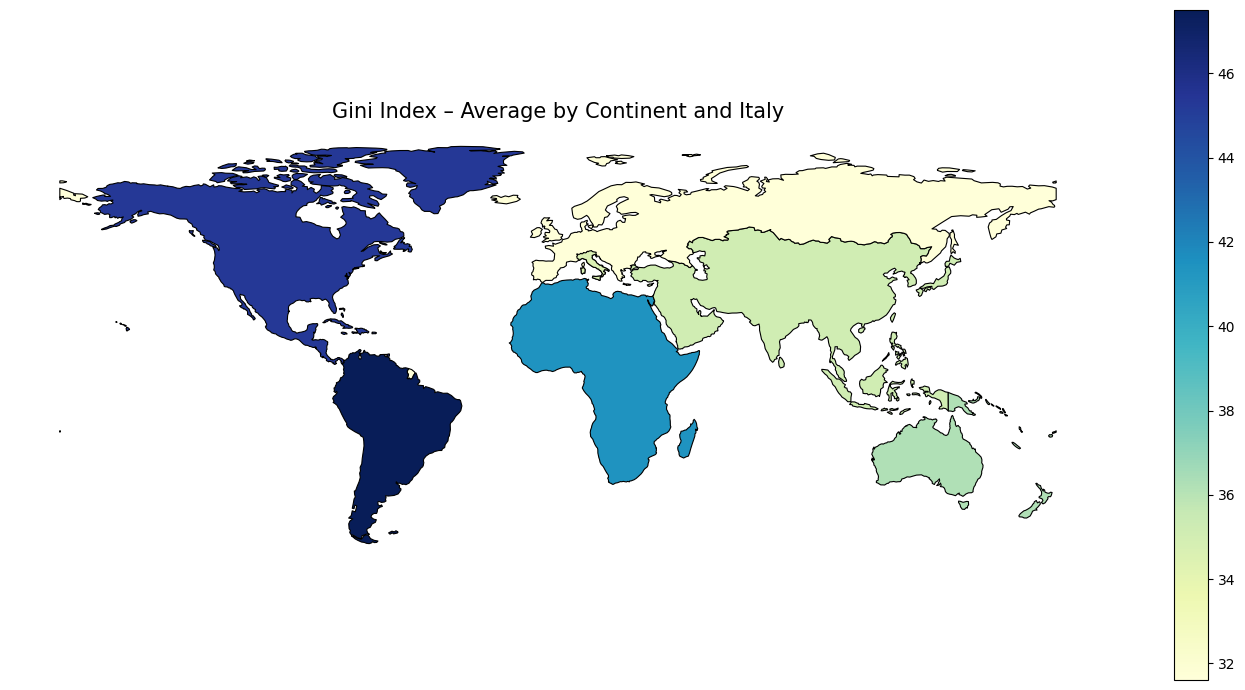

In [51]:
# === PREPARA I DATI ===
indicator = "Gini index"
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].dropna()
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Media per continente
continent_avg = df_valid.groupby('Continent')[indicator].mean().reset_index()

# Media per l’Italia
italy_value = df_valid[df_valid['Country Name'] == 'Italy'][indicator].mean()
italy_row = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_value]})

# Combina continenti + Italia
df_plot = pd.concat([continent_avg, italy_row], ignore_index=True)

# === CARICA SHAPEFILE ===
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Mappa i continenti
continent_map = {
    'Africa': 'Africa',
    'Asia': 'Asia',
    'Europe': 'Europe',
    'North America': 'North America',
    'South America': 'South America',
    'Oceania': 'Oceania'
}
world['Continent'] = world['CONTINENT'].map(lambda x: continent_map.get(x, None))

# Raggruppa per continente
gdf_continents = world.dissolve(by='Continent', as_index=False)
gdf_continents = gdf_continents.merge(df_plot, on='Continent', how='left')

# Geometria per Italia
gdf_italy = world[world['NAME'] == 'Italy'].copy()
gdf_italy['Continent'] = 'Italy'
gdf_italy[indicator] = italy_value

# Unisci i dati
gdf_final = pd.concat([gdf_continents, gdf_italy], ignore_index=True)
gdf_final = gpd.GeoDataFrame(gdf_final)

# Centroidi per etichette
gdf_final['centroid'] = gdf_final.geometry.representative_point()

# === PLOTTAGGIO CON YlGnBu ===
fig, ax = plt.subplots(figsize=(14, 7))
gdf_final.plot(
    column=indicator,
    cmap='YlGnBu',
    legend=True,
    linewidth=0.8,
    edgecolor='black',
    ax=ax
)

ax.set_title("Gini Index – Average by Continent and Italy", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()

C:\Users\Pancione\AppData\Local\Temp\ipykernel_10064\1282934251.py:46: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap("viridis", 256)


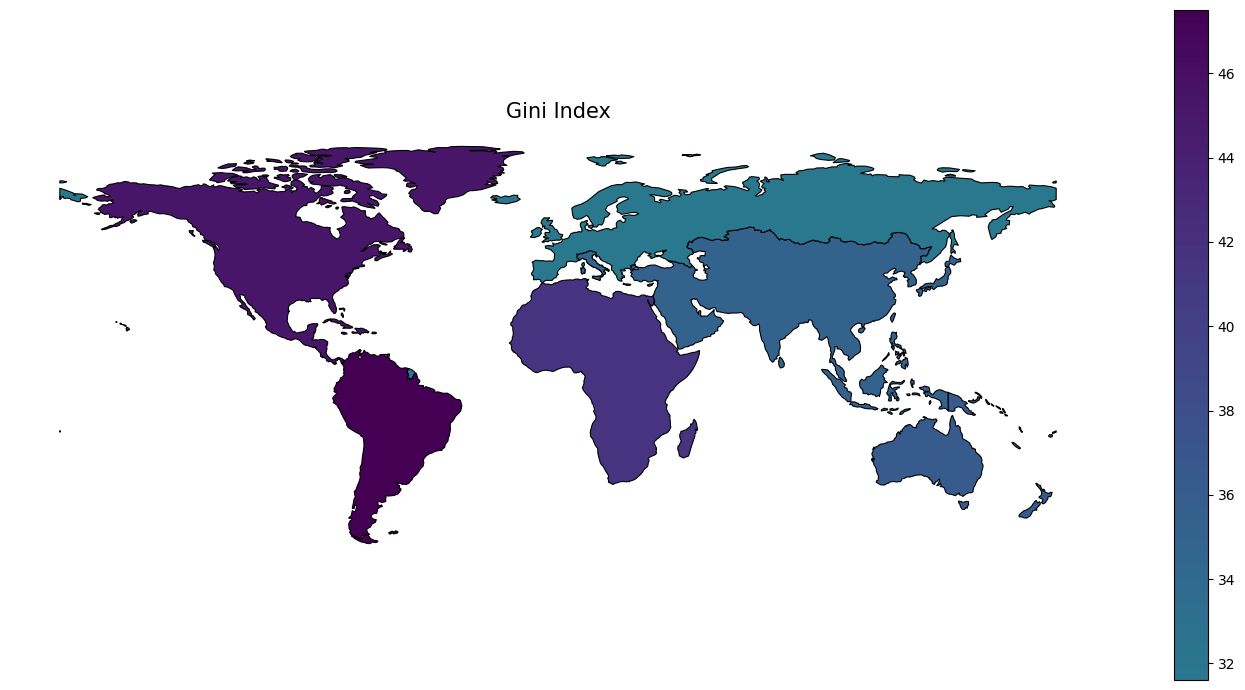

In [29]:
indicator = "Gini index"
df_valid = df[['Country Name', 'Continent', 'Year', indicator]].dropna()
df_valid['Year'] = pd.to_numeric(df_valid['Year'], errors='coerce')

# Calcola media per continente
continent_avg = df_valid.groupby('Continent')[indicator].mean().reset_index()

# Calcola media per Italia
italy_value = df_valid[df_valid['Country Name'] == 'Italy'][indicator].mean()
italy_row = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_value]})

# Combina Italia + Continenti
df_plot = pd.concat([continent_avg, italy_row], ignore_index=True)

# === 3. Carica shapefile mondo da Natural Earth ===
world = gpd.read_file("ne_110m_admin_0_countries.shp")

# Mappa continenti da GeoPandas a ESG
continent_map = {
    'Africa': 'Africa',
    'Asia': 'Asia',
    'Europe': 'Europe',
    'North America': 'North America',
    'South America': 'South America',
    'Oceania': 'Oceania'
}
world['Continent'] = world['CONTINENT'].map(lambda x: continent_map.get(x, None))

# Raggruppa per continente
gdf_continents = world.dissolve(by='Continent', as_index=False)
gdf_continents = gdf_continents.merge(df_plot, on='Continent', how='left')

# Estrai geometria dell’Italia
gdf_italy = world[world['NAME'] == 'Italy'].copy()
gdf_italy['Continent'] = 'Italy'
gdf_italy[indicator] = italy_value

# Combina tutto
gdf_final = pd.concat([gdf_continents, gdf_italy], ignore_index=True)
gdf_final = gpd.GeoDataFrame(gdf_final)

# Centroidi per etichette
gdf_final['centroid'] = gdf_final.geometry.representative_point()

# Estrai solo la parte blu di viridis
viridis = cm.get_cmap("viridis", 256)
viridis_blu = LinearSegmentedColormap.from_list(
    "viridis_blu",
    viridis(np.linspace(0.4, 0.0, 256))  # solo la porzione blu-verde-grigio
)

# === 4. Plotta la mappa ===
fig, ax = plt.subplots(figsize=(14, 7))
gdf_final.plot(
    column=indicator,
    cmap=viridis_blu,
    legend=True,
    linewidth=0.8,
    edgecolor='black',
    ax=ax
)

ax.set_title("Gini Index", fontsize=15)
ax.axis('off')
plt.tight_layout()
plt.show()


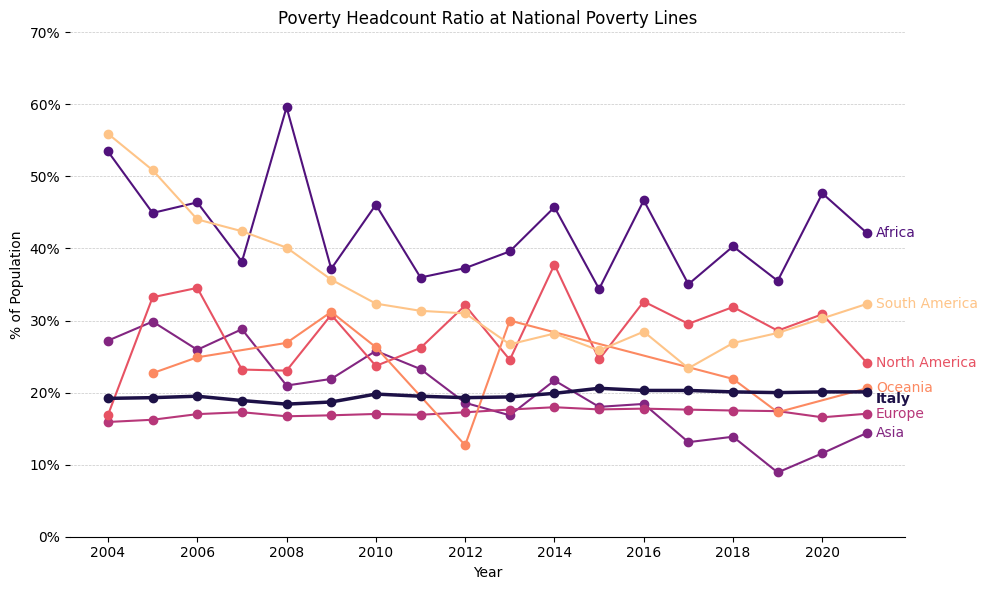

In [53]:
indicator = "Poverty headcount ratio at national poverty lines (% of population)"

# Prepara i dati
df_valid_poverty = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid_poverty = df_valid_poverty.dropna(subset=[indicator])
df_valid_poverty['Year'] = pd.to_numeric(df_valid_poverty['Year'], errors='coerce')

# Trasforma in percentuale (da frazioni)
df_valid_poverty[indicator] *= 100

# Limita al 2021 (incluso)
df_valid_poverty = df_valid_poverty[df_valid_poverty['Year'] <= 2021]

# Calcola medie per continente e dati Italia
continent_means_poverty = df_valid_poverty.groupby(['Continent', 'Year'])[indicator].mean().reset_index()
italy_data_poverty = df_valid_poverty[df_valid_poverty['Country Name'] == 'Italy'].copy()

# Palette coerente
entities = ['Italy'] + list(continent_means_poverty['Continent'].unique())
palette = sns.color_palette("magma", n_colors=len(entities))
color_map = dict(zip(entities, palette))

# Plot line chart
plt.figure(figsize=(10, 6))

# Linee per i continenti
for continent in continent_means_poverty['Continent'].unique():
    subset = continent_means_poverty[continent_means_poverty['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=color_map[continent], marker='o')
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0],
            continent,
            verticalalignment='center',
            color=color_map[continent]
        )

# Linea Italia
plt.plot(
    italy_data_poverty['Year'],
    italy_data_poverty[indicator],
    linewidth=2.5,
    linestyle='-',
    marker='o',
    color=color_map['Italy']
)
plt.text(
    italy_data_poverty['Year'].max() + 0.2,
    italy_data_poverty[indicator].iloc[-1],
    'Italy',
    verticalalignment='top',
    fontweight='bold',
    color=color_map['Italy']
)

# Personalizzazione
plt.title("Poverty Headcount Ratio at National Poverty Lines")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 70)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)  # rimuove l'asse Y
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

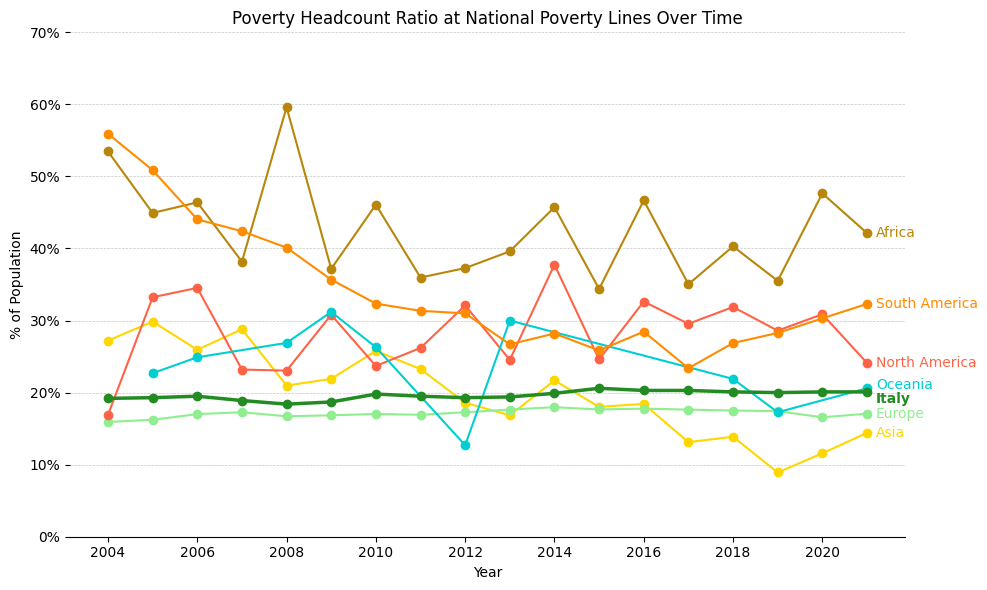

In [75]:
# === INDICATORE ===
indicator = "Poverty headcount ratio at national poverty lines (% of population)"

# === PALETTE PERSONALIZZATA ===
custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# === DATI ===
df_valid_poverty = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid_poverty = df_valid_poverty.dropna(subset=[indicator])
df_valid_poverty['Year'] = pd.to_numeric(df_valid_poverty['Year'], errors='coerce')
df_valid_poverty[indicator] *= 100  # trasformazione in percentuale
df_valid_poverty = df_valid_poverty[df_valid_poverty['Year'] <= 2021]

continent_means_poverty = df_valid_poverty.groupby(['Continent', 'Year'])[indicator].mean().reset_index()
italy_data_poverty = df_valid_poverty[df_valid_poverty['Country Name'] == 'Italy'].copy()

# Applichiamo offset visivi solo alle etichette di Italia e Oceania
offsets = {
    'Italy': 0,
    'Oceania': 0.5
}

# === GRAFICO CON OFFSET ===
plt.figure(figsize=(10, 6))

# Linee dei continenti
for continent in continent_means_poverty['Continent'].unique():
    subset = continent_means_poverty[continent_means_poverty['Continent'] == continent]
    plt.plot(subset['Year'], subset[indicator], label=continent, color=custom_colors.get(continent, 'gray'), marker='o')
    last_point = subset[subset['Year'] == subset['Year'].max()]
    if not last_point.empty:
        offset = offsets.get(continent, 0)
        plt.text(
            last_point['Year'].values[0] + 0.2,
            last_point[indicator].values[0] + offset,
            continent,
            verticalalignment='center',
            color=custom_colors.get(continent, 'gray')
        )

# Linea Italia
plt.plot(
    italy_data_poverty['Year'],
    italy_data_poverty[indicator],
    linewidth=2.5,
    linestyle='-',
    marker='o',
    color=custom_colors['Italy']
)
plt.text(
    italy_data_poverty['Year'].max() + 0.2,
    italy_data_poverty[indicator].iloc[-1] + offsets.get('Italy', 0),
    'Italy',
    verticalalignment='top',
    fontweight='bold',
    color=custom_colors['Italy']
)

# Personalizzazione
plt.title("Poverty Headcount Ratio at National Poverty Lines Over Time")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 70)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


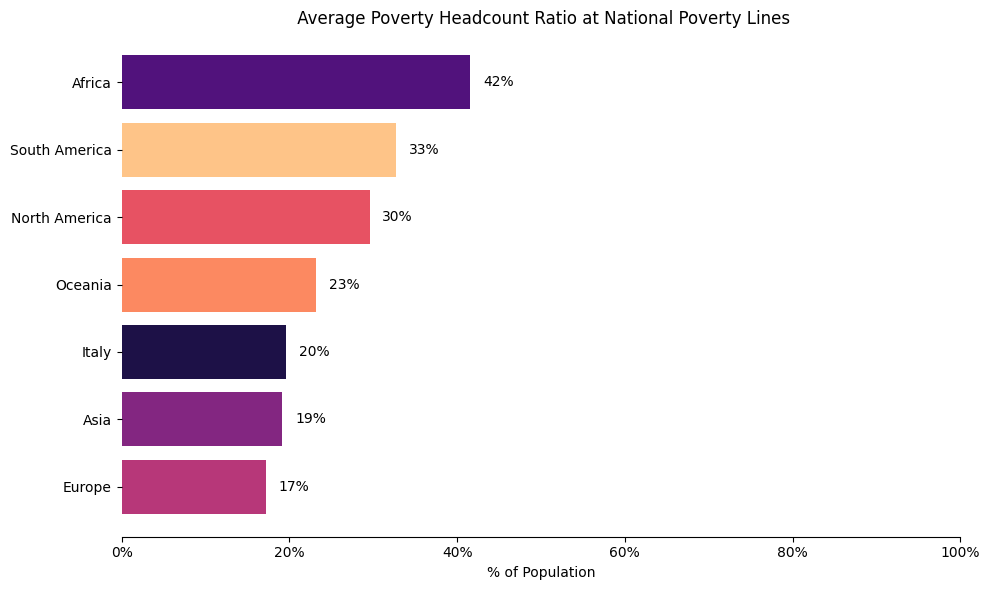

In [31]:
indicator = "Poverty headcount ratio at national poverty lines (% of population)"

# Prepara il DataFrame valido
df_valid_poverty = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid_poverty = df_valid_poverty.dropna(subset=[indicator])
df_valid_poverty['Year'] = pd.to_numeric(df_valid_poverty['Year'], errors='coerce')

# Calcola media per continente su tutti gli anni
continent_avg_all_poverty = df_valid_poverty.groupby('Continent')[indicator].mean().reset_index()

# Calcola media per l’Italia
italy_avg_value_poverty = df_valid_poverty[df_valid_poverty['Country Name'] == 'Italy'][indicator].mean()
italy_row_avg_poverty = pd.DataFrame({'Continent': ['Italy'], indicator: [italy_avg_value_poverty]})

# Combina e ordina i dati
df_bar_avg_poverty = pd.concat([italy_row_avg_poverty, continent_avg_all_poverty], ignore_index=True)
df_bar_sorted_avg_poverty = df_bar_avg_poverty.sort_values(by=indicator, ascending=True)

# Moltiplica per 100 per mostrare % reali
df_bar_sorted_avg_poverty[indicator] *= 100

# Crea la palette coerente
entities = ['Italy'] + list(continent_avg_all_poverty['Continent'].unique())
palette = sns.color_palette("magma", n_colors=len(entities))
color_map = dict(zip(entities, palette))
ordered_labels = df_bar_sorted_avg_poverty['Continent'].tolist()
bar_colors = [color_map[label] for label in ordered_labels]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(
    df_bar_sorted_avg_poverty['Continent'],
    df_bar_sorted_avg_poverty[indicator],
    color=bar_colors
)

# Etichette accanto alle barre
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 1.5, bar.get_y() + bar.get_height() / 2, f"{int(round(xval))}%", va='center')

# Stile
plt.title(" Average Poverty Headcount Ratio at National Poverty Lines")
plt.xlabel("% of Population")
plt.xlim(0, 100)

# Pulizia bordi e asse in formato percentuale
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=0))

plt.tight_layout()
plt.show()


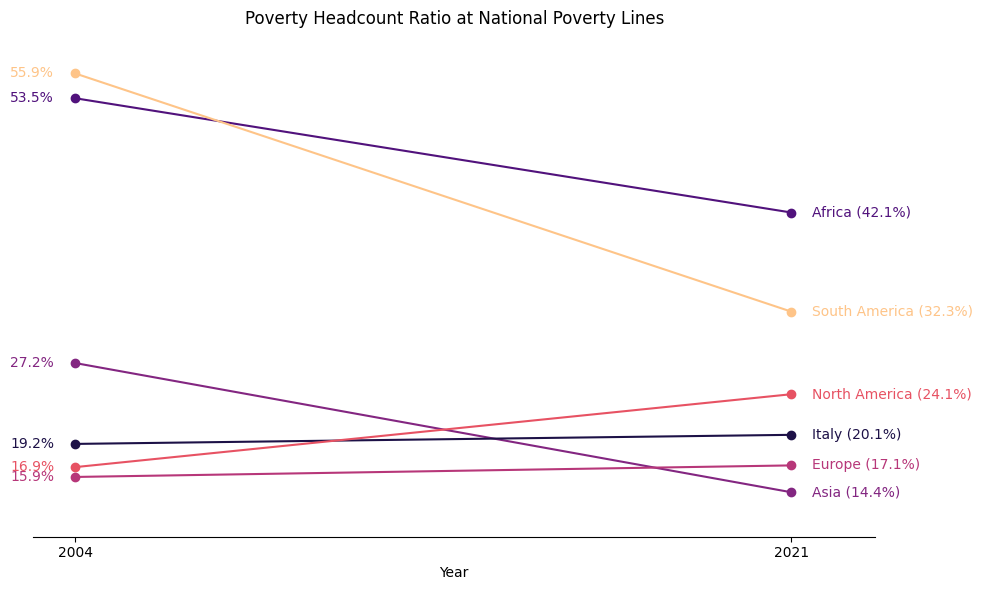

In [52]:
indicator = "Poverty headcount ratio at national poverty lines (% of population)"
# Prepara i dati per lo slope chart: 2004 vs 2021
years_slope = [2004, 2021]
df_slope_poverty = df_valid_poverty[df_valid_poverty['Year'].isin(years_slope)].copy()

# Media per continente
continent_slope_poverty = df_slope_poverty.groupby(['Continent', 'Year'])[indicator].mean().reset_index()

# Dato per l’Italia
italy_slope_poverty = df_slope_poverty[df_slope_poverty['Country Name'] == 'Italy'][['Year', indicator]].copy()
italy_slope_poverty['Continent'] = 'Italy'

# Unione
df_slope_all = pd.concat([continent_slope_poverty, italy_slope_poverty], ignore_index=True)

# Pivot per slope chart
df_slope_pivot = df_slope_all.pivot(index='Continent', columns='Year', values=indicator).dropna()

# Plot
plt.figure(figsize=(10, 6))
for idx in df_slope_pivot.index:
    plt.plot([2004, 2021], df_slope_pivot.loc[idx], marker='o', label=idx, color=color_map.get(idx, 'gray'))
    plt.text(2021 + 0.5, df_slope_pivot.loc[idx, 2021], f"{idx} ({df_slope_pivot.loc[idx, 2021]:.1f}%)",
             va='center', color=color_map.get(idx, 'gray'))
    plt.text(2004 - 0.5, df_slope_pivot.loc[idx, 2004], f"{df_slope_pivot.loc[idx, 2004]:.1f}%",
             va='center', ha='right', color=color_map.get(idx, 'gray'))
    
plt.xticks([2004, 2021])
plt.xlim(2003, 2023)
plt.title("Poverty Headcount Ratio at National Poverty Lines")
plt.xlabel("Year")
plt.ylim(10, 60)
plt.yticks([])
plt.grid(axis='y', linestyle='--', alpha=0.3)

# Rimuovi bordi superflui
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()

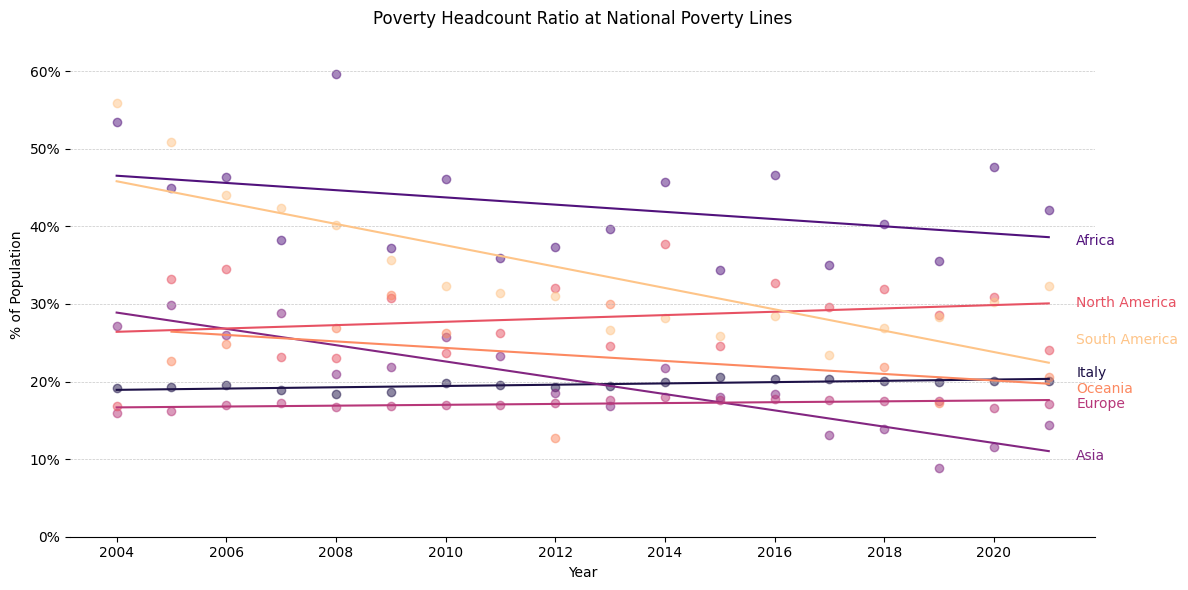

In [67]:
indicator = "Poverty headcount ratio at national poverty lines (% of population)"

# Prepara il DataFrame valido
df_valid_poverty = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid_poverty = df_valid_poverty.dropna(subset=[indicator])
df_valid_poverty['Year'] = pd.to_numeric(df_valid_poverty['Year'], errors='coerce')
df_valid_poverty[indicator] *= 100  # Converti in percentuale

# Aggiungi l'Italia come "continente"
italy_data = df_valid_poverty[df_valid_poverty['Country Name'] == 'Italy'].copy()
italy_data['Continent'] = 'Italy'

# Combina i dati
combined_data = pd.concat([df_valid_poverty, italy_data], ignore_index=True)

# Media per ogni anno per ciascun continente/Italia
scatter_avg = combined_data.groupby(['Continent', 'Year'])[indicator].mean().reset_index()
scatter_avg_limited = scatter_avg[scatter_avg['Year'] <= 2021]

# Ordine fisso delle entità
ordered_entities = ['Italy', 'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
palette_fixed = sns.color_palette("magma", n_colors=len(ordered_entities))
color_map_fixed = dict(zip(ordered_entities, palette_fixed))

# Offset personalizzati per le etichette
label_offsets = {
    'Italy': 1,
    'Europe': 0,
    'North America': 6,
    'South America': -7,
    'Asia': -4,
    'Africa': -4,
    'Oceania': -1.5
}

# Plot aggiornato
plt.figure(figsize=(12, 6))

for entity in ordered_entities:
    if entity in scatter_avg_limited['Continent'].unique():
        data = scatter_avg_limited[scatter_avg_limited['Continent'] == entity]
        plt.scatter(data['Year'], data[indicator], label=entity, color=color_map_fixed[entity], marker='o', alpha=0.5)
        sns.regplot(
            x='Year', y=indicator, data=data,
            scatter=False, ci=None, color=color_map_fixed[entity], line_kws={'linewidth': 1.5}
        )
        # Etichetta con offset regolabile
        last_year = data['Year'].max()
        last_value = data[data['Year'] == last_year][indicator].values[0]
        offset = label_offsets.get(entity, 0)
        plt.text(
            last_year + 0.5,
            last_value + offset,
            entity,
            verticalalignment='center',
            color=color_map_fixed[entity]
        )

# Stile del grafico
plt.title("Poverty Headcount Ratio at National Poverty Lines")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 65)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False) 
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

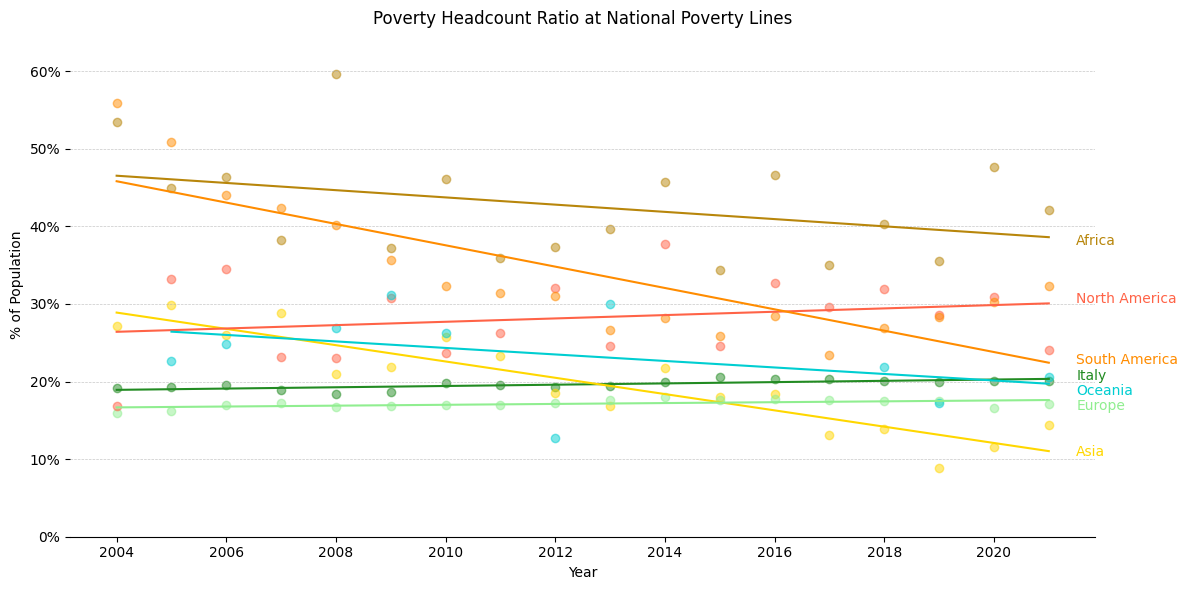

In [70]:
# === INDICATORE ===
indicator = "Poverty headcount ratio at national poverty lines (% of population)"

# === PALETTE PERSONALIZZATA ===
custom_colors = {
    'Africa': 'darkgoldenrod',
    'North America': 'tomato',
    'South America': 'darkorange',
    'Asia': 'gold',
    'Europe': 'lightgreen',
    'Italy': 'forestgreen',
    'Oceania': 'darkturquoise',
}

# === PREPARA I DATI ===
df_valid_poverty = df[['Country Name', 'Continent', 'Year', indicator]].copy()
df_valid_poverty = df_valid_poverty.dropna(subset=[indicator])
df_valid_poverty['Year'] = pd.to_numeric(df_valid_poverty['Year'], errors='coerce')
df_valid_poverty[indicator] *= 100  # Converti in percentuale

# Aggiungi l'Italia come "continente"
italy_data = df_valid_poverty[df_valid_poverty['Country Name'] == 'Italy'].copy()
italy_data['Continent'] = 'Italy'

# Unisci ai dati globali
combined_data = pd.concat([df_valid_poverty, italy_data], ignore_index=True)

# Calcola le medie per anno e continente/Italia
scatter_avg = combined_data.groupby(['Continent', 'Year'])[indicator].mean().reset_index()
scatter_avg_limited = scatter_avg[scatter_avg['Year'] <= 2021]

# Ordine fisso per leggibilità
ordered_entities = ['Italy', 'Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']

# Offset per etichette
label_offsets = {
    'Italy': 0.6,
    'Europe': -0.2,
    'North America': 6.5,
    'South America': -9.5,
    'Asia': -3.5,
    'Africa': -4,
    'Oceania': -1.8
}

# === PLOT ===
plt.figure(figsize=(12, 6))

for entity in ordered_entities:
    if entity in scatter_avg_limited['Continent'].unique():
        data = scatter_avg_limited[scatter_avg_limited['Continent'] == entity]
        plt.scatter(data['Year'], data[indicator], label=entity, color=custom_colors[entity], marker='o', alpha=0.5)
        sns.regplot(
            x='Year', y=indicator, data=data,
            scatter=False, ci=None, color=custom_colors[entity], line_kws={'linewidth': 1.5}
        )
        # Etichetta con offset personalizzato
        last_year = data['Year'].max()
        last_value = data[data['Year'] == last_year][indicator].values[0]
        offset = label_offsets.get(entity, 0)
        plt.text(
            last_year + 0.5,
            last_value + offset,
            entity,
            verticalalignment='center',
            color=custom_colors[entity]
        )

# === STILE ===
plt.title("Poverty Headcount Ratio at National Poverty Lines")
plt.xlabel("Year")
plt.ylabel("% of Population")
plt.ylim(0, 65)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()


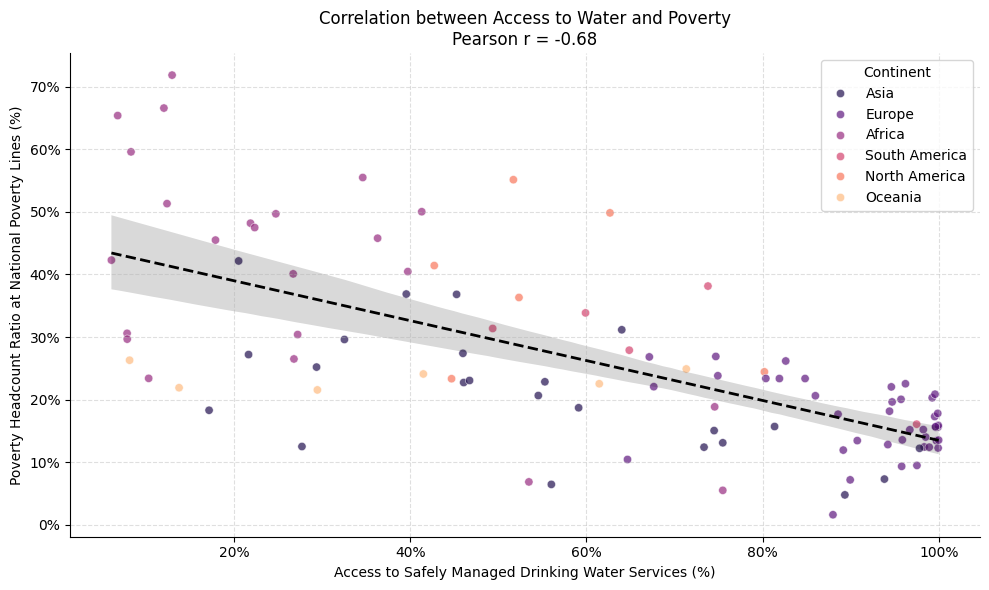

In [34]:
poverty_indicator = "Poverty headcount ratio at national poverty lines (% of population)"
water_indicator = "People using safely managed drinking water services (% of population)"

# === 3. Prepara i dati ===
df_corr = df[['Country Name', 'Year', poverty_indicator, water_indicator, 'Continent']].copy()
df_corr = df_corr.dropna(subset=[poverty_indicator, water_indicator])
df_corr['Year'] = pd.to_numeric(df_corr['Year'], errors='coerce')
df_corr['Continent'] = df_corr['Continent'].fillna('Italy')

# === 4. Converti in percentuali ===
df_corr[poverty_indicator] *= 100
df_corr[water_indicator] *= 100

# === 5. Calcola la media per paese ===
df_corr_avg = df_corr.groupby(['Country Name', 'Continent'])[[poverty_indicator, water_indicator]].mean().reset_index()

# === 6. Scatter plot + regressione ===
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_corr_avg,
    x=water_indicator,
    y=poverty_indicator,
    hue='Continent',
    palette='magma',
    alpha=0.7
)

# Linea di regressione
sns.regplot(
    data=df_corr_avg,
    x=water_indicator,
    y=poverty_indicator,
    scatter=False,
    color='black',
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

# Correlazione
corr_value = df_corr_avg[poverty_indicator].corr(df_corr_avg[water_indicator])

# === 7. Personalizzazione grafico ===
plt.title(f"Correlation between Access to Water and Poverty\nPearson r = {corr_value:.2f}")
plt.xlabel("Access to Safely Managed Drinking Water Services (%)")
plt.ylabel("Poverty Headcount Ratio at National Poverty Lines (%)")
plt.grid(True, linestyle='--', alpha=0.4)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=0))

plt.tight_layout()
plt.show()

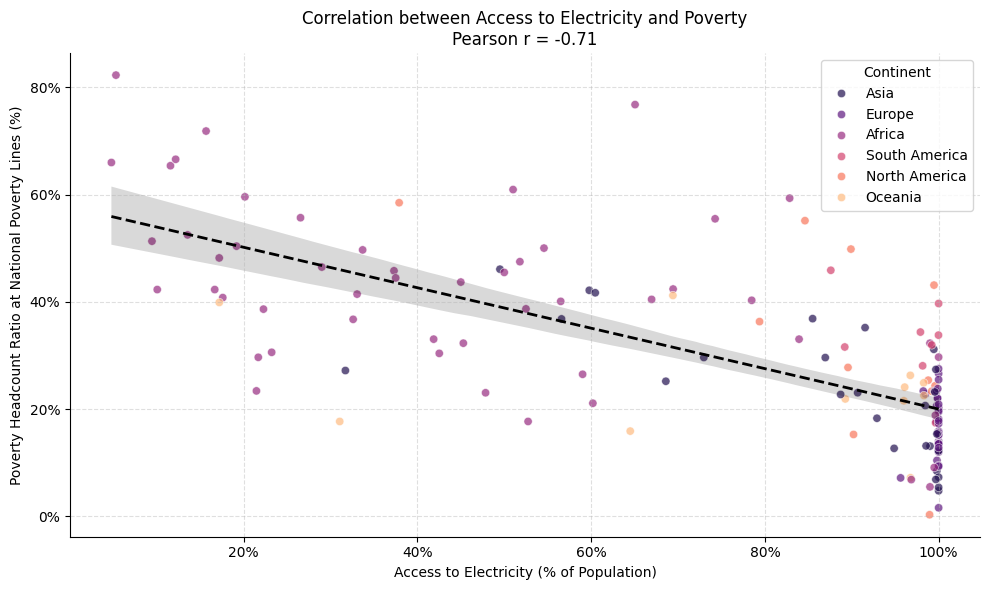

In [35]:
# Imposta i due indicatori per la nuova correlazione
electricity_indicator = "Access to electricity (% of population)"

# Prepara i dati per la correlazione con electricity
df_corr_el = df[['Country Name', 'Year', poverty_indicator, electricity_indicator, 'Continent']].copy()
df_corr_el = df_corr_el.dropna(subset=[poverty_indicator, electricity_indicator])
df_corr_el['Year'] = pd.to_numeric(df_corr_el['Year'], errors='coerce')
df_corr_el['Continent'] = df_corr_el['Continent'].fillna('Italy')

# Converti in percentuali
df_corr_el[poverty_indicator] *= 100
df_corr_el[electricity_indicator] *= 100

# Media per paese su tutti gli anni
df_corr_avg_el = df_corr_el.groupby(['Country Name', 'Continent'])[[poverty_indicator, electricity_indicator]].mean().reset_index()

# Plot con palette magma
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_corr_avg_el,
    x=electricity_indicator,
    y=poverty_indicator,
    hue='Continent',
    palette='magma',
    alpha=0.7
)
sns.regplot(
    data=df_corr_avg_el,
    x=electricity_indicator,
    y=poverty_indicator,
    scatter=False,
    color='black',
    line_kws={'linewidth': 2, 'linestyle': '--'}
)

# Calcola correlazione
corr_el = df_corr_avg_el[poverty_indicator].corr(df_corr_avg_el[electricity_indicator])
plt.title(f"Correlation between Access to Electricity and Poverty\nPearson r = {corr_el:.2f}")
plt.xlabel("Access to Electricity (% of Population)")
plt.ylabel("Poverty Headcount Ratio at National Poverty Lines (%)")
plt.grid(True, linestyle='--', alpha=0.4)

# Stile assi
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=0))
ax.xaxis.set_major_formatter(ticker.PercentFormatter(xmax=100, decimals=0))

plt.tight_layout()
plt.show()